# Survey Analysis

In [1]:
# Data processing
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import math
import textwrap
from datetime import datetime
from collections import OrderedDict

%matplotlib inline

import locale # For currency formatting
locale.setlocale(locale.LC_ALL, '')

# Common DGLIM utilities
import dglim
dglim.setProjectPath('../')
dglim.usePlotStyle()


## Load Data

In [2]:
master_df = dglim.loadData("Master Dataset")

## Prepare for Analysis

In [3]:
business_type_counts = master_df['Business Type'].value_counts()
survey_df = master_df.dropna(subset=['Finished Survey'])

*** Compute weights that can be used to make survey results more representative ***

In [4]:
weights_dict = {}

# Get total count for each type of business surveyed
survey_business_type_counts = survey_df['Business Type'].value_counts()

# Count total number of businesses that have a type
total_count = float(business_type_counts.sum())
total_surveyed = float(survey_business_type_counts.sum())

# Compute weights per business
for business_type in business_type_counts.index:
    master_type_count = business_type_counts[business_type]
    survey_type_count = survey_business_type_counts[business_type] if business_type in survey_business_type_counts else 0
    
    if survey_type_count:
        weight = (master_type_count / total_count if master_type_count else 0) / float(survey_type_count / total_surveyed)
    else:
        weight = 3
    # Note: "PEDDLER" is the only type that fails the "if rec.values"

    # Trim top 1% to reasonable values
    weight = min(weight, 3.00)

    weights_dict[business_type] = weight

# WHAT THIS IS DOING ---
# For each type:
#    Divide the number of businesses of that type by the total number of businesses
#    Divide that percentage by the percentage of survey businesses that match the type
#
#    In other words, the weight is the ratio of the percentage in active_businesses to the percentage in the survey

master_df['Weight'] = master_df['Business Type'].apply(lambda x : weights_dict[x])

print "Number of retail businesses:", business_type_counts['RETAIL MERCHANT']
print "Total number of businesses:", total_count

Number of retail businesses: 845
Total number of businesses: 7044.0


In [5]:
survey_df = master_df.dropna(subset=['Finished Survey'])

In [6]:
# TODO: remove?
def to_int(num):
    try:
        val = int(num)
        return val
    except:
        pass

In [7]:
data_df = survey_df
column = 'Q9'

temp_df = data_df[[column, 'Weight']].copy()
temp_df['Count'] = 1
temp_df = temp_df.groupby(by=[column]).sum()

# Calculate frequency distribution
total_weight = temp_df['Weight'].sum()
total_count = temp_df['Count'].sum()

temp_df['Weighted Frequency'] = temp_df['Weight'] / total_weight
temp_df['Counted Frequency'] = temp_df['Count'] / total_count

temp_df

,Weight,Count,Weighted Frequency,Counted Frequency
Q9,,,,
1,7.883194,11,0.419294,0.458333
2,0.920310,2,0.048950,0.083333
3,2.109635,2,0.112208,0.083333
4,1.081088,1,0.057501,0.041667
5,1.588018,2,0.084464,0.083333
6,2.109451,2,0.112198,0.083333
7,1.081088,1,0.057501,0.041667
10,0.336267,1,0.017886,0.041667
15,1.028363,1,0.054697,0.041667


In [8]:
def numberOfResponses(column, data_df=survey_df):
    return len(data_df[column].dropna())

def plotFrequencyDistribution(column, data_df=survey_df):
    data_df[column] \
    .dropna() \
    .value_counts(normalize=True) \
    .sort_index() \
    .plot(kind='bar', figsize=(20, 5))

def analyzeResponses(column, data_df=survey_df):
    print "Number of responses:", numberOfResponses(column, data_df)
    plotFrequencyDistribution(column, data_df)

def analyzeWeightedResponses(column, data_df=survey_df):
    # Weight responses before tallying
    temp_df = data_df[[column, 'Weight']].copy()
    temp_df['Count'] = 1
    temp_df = temp_df.groupby(by=[column]).sum()

    # Calculate frequency distribution
    total_weight = temp_df['Weight'].sum()
    total_count = temp_df['Count'].sum()

    temp_df['Weighted Frequency'] = temp_df['Weight'] / total_weight
    temp_df['Counted Frequency'] = temp_df['Count'] / total_count

    # Print statistics
    average = temp_df['Weighted Frequency']
    print average

    # Plot responses distribution
    temp_df['Weighted Frequency'] \
    .dropna() \
    .sort_index() \
    .plot(kind='bar', figsize=(20, 5))

** Q7 - How many employees currently work at this location of your business? Please include all full and part time employees. Do not include anyone that did work as an independent contractor or subcontractor. **

Number of Employees
0      0.112234
1      0.194853
2      0.115551
3      0.067319
4      0.080027
5      0.026431
6      0.051928
7      0.039296
8      0.021415
9      0.013959
10     0.042783
11     0.007285
12     0.012429
13     0.006040
14     0.013454
15     0.030305
16     0.006355
17     0.014592
18     0.007022
19     0.002023
20     0.007965
21     0.001980
22     0.006454
23     0.002131
24     0.003301
25     0.018441
26     0.001659
27     0.004731
28     0.002131
29     0.007548
         ...   
31     0.002421
32     0.000697
35     0.004230
37     0.007563
38     0.002200
39     0.002240
40     0.008420
41     0.003741
50     0.004552
52     0.002131
53     0.000440
57     0.001232
58     0.001100
60     0.004772
62     0.000566
63     0.001265
65     0.002728
70     0.002631
80     0.001540
83     0.001078
85     0.000968
87     0.000880
89     0.002240
90     0.001659
95     0.002861
100    0.002240
120    0.002240
128    0.002631
150    0.002090
249    0.001496
Name

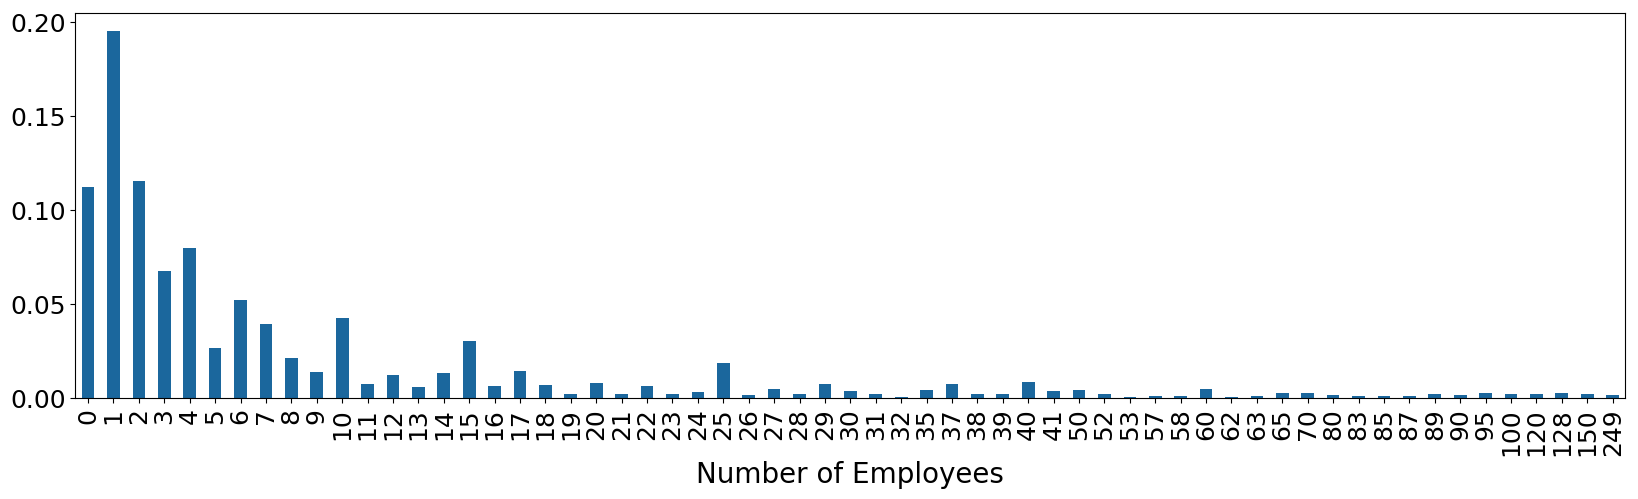

In [9]:
analyzeWeightedResponses('Number of Employees')

** Q8 - How many employees worked at this location of your business as of January 1, 2017? Please include all full and part time employees. Do not include anyone that did work as an independent contractor or subcontractor. **

Q8
0      0.135041
1      0.209559
2      0.082076
3      0.079665
4      0.060837
5      0.043126
6      0.048987
7      0.030456
8      0.029443
9      0.020560
10     0.033704
11     0.003001
12     0.016735
13     0.009630
14     0.009625
15     0.028333
16     0.007687
17     0.012892
18     0.009069
20     0.021127
21     0.001995
22     0.004356
23     0.001367
24     0.001256
25     0.021532
27     0.003325
29     0.007093
30     0.004559
32     0.000700
34     0.001552
35     0.001601
36     0.002779
37     0.002147
38     0.005985
39     0.004513
40     0.004895
52     0.002147
53     0.000443
55     0.001241
58     0.001108
60     0.002660
65     0.002748
70     0.002650
80     0.001086
83     0.000975
85     0.004695
88     0.000887
90     0.003222
95     0.002881
100    0.003531
120    0.002257
125    0.002650
150    0.002106
240    0.001507
Name: Weighted Frequency, dtype: float64


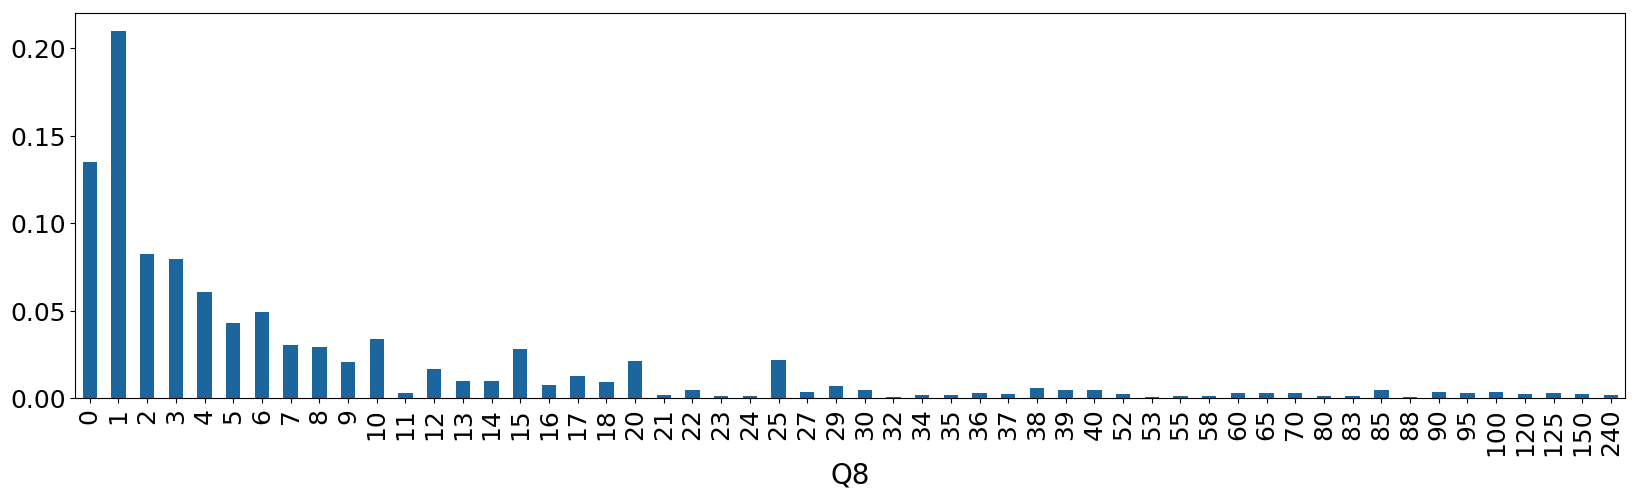

In [10]:
analyzeWeightedResponses('Q8')

** Q9 - How many employees worked at this location of your business when it closed? Please include all full and part time employees. Do not include anyone that did work as an independent contractor or subcontractor. **

Q9
1     0.419294
2     0.048950
3     0.112208
4     0.057501
5     0.084464
6     0.112198
7     0.057501
10    0.017886
15    0.054697
27    0.035300
Name: Weighted Frequency, dtype: float64


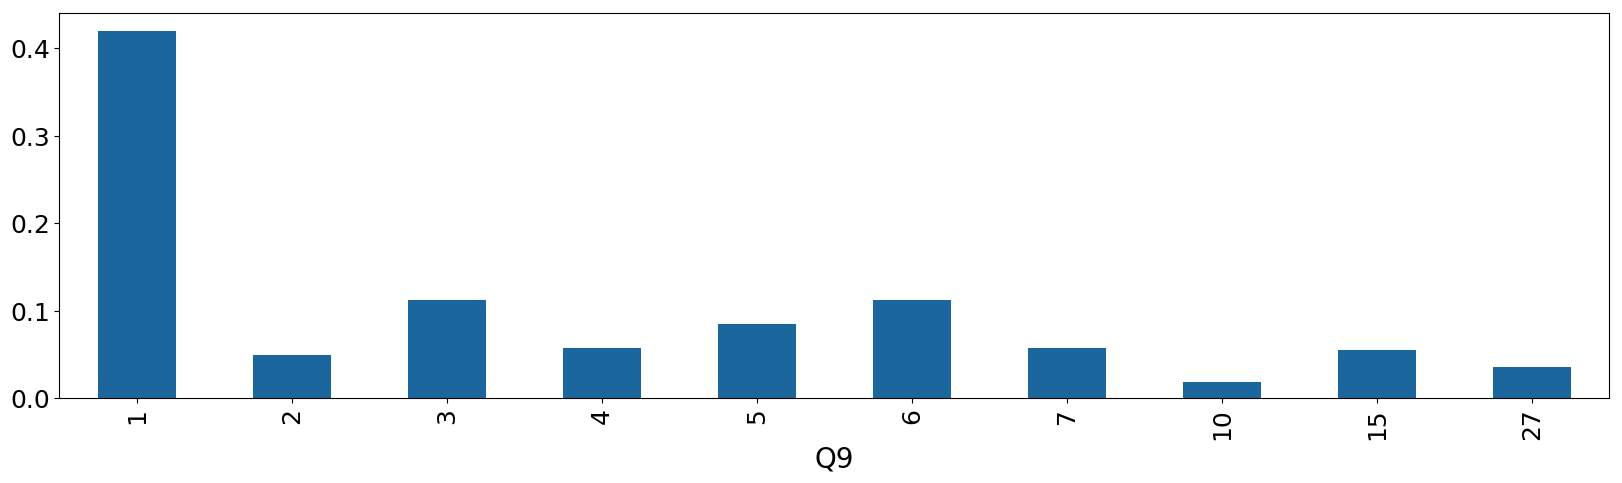

In [11]:
analyzeWeightedResponses('Q9')

In [12]:
year_map = {}
yr = 58
for i in range(1,7):
    year_map[i] = yr
    yr -= 1
yr = 48
for i in range(7,55):
    year_map[i] = yr
    yr -= 1

In [13]:
# years_in_bus_vs_num_emp = master_df[['Q3','Q7']][master_df['Business Type'] == 'RESTAURANT'].dropna()

In [14]:
# years_in_bus_vs_num_emp['Q3'] = years_in_bus_vs_num_emp['Q3'].apply(lambda x : year_map[x])

In [15]:
# plt.figure(figsize=(20,10))
# plt.scatter(years_in_bus_vs_num_emp['Q3'], years_in_bus_vs_num_emp['Q7'])
# plt.xlabel("Years in business")
# plt.ylabel("Number of employees")

** Q8     - How many employees worked at this location of your business as of January 1, 2017? Please include all full and part time employees. Do not include anyone that did work as an independent contractor or subcontractor **

In [16]:
# num_res_df.loc['Q8']

In [17]:
# survey_df['Q8'] = survey_df['Q8'].apply(to_int)

** Change in number of employees **

In [18]:
# change_in_num_emp = survey_df['Q7']- survey_df['Q8']
# survey_df['change_in_emp_cnt'] = change_in_num_emp

In [19]:
# survey_df['change_in_emp_cnt']

*** "The next set of questions is about the phases a business might go through." ***

** Q10 - The dream phase involves activities such as brainstorming ideas for a business. Would you have liked the City of Gainesville to provide services when your business was in the dream phase? **

Q10
1    0.361524
2    0.638476
Name: Weighted Frequency, dtype: float64


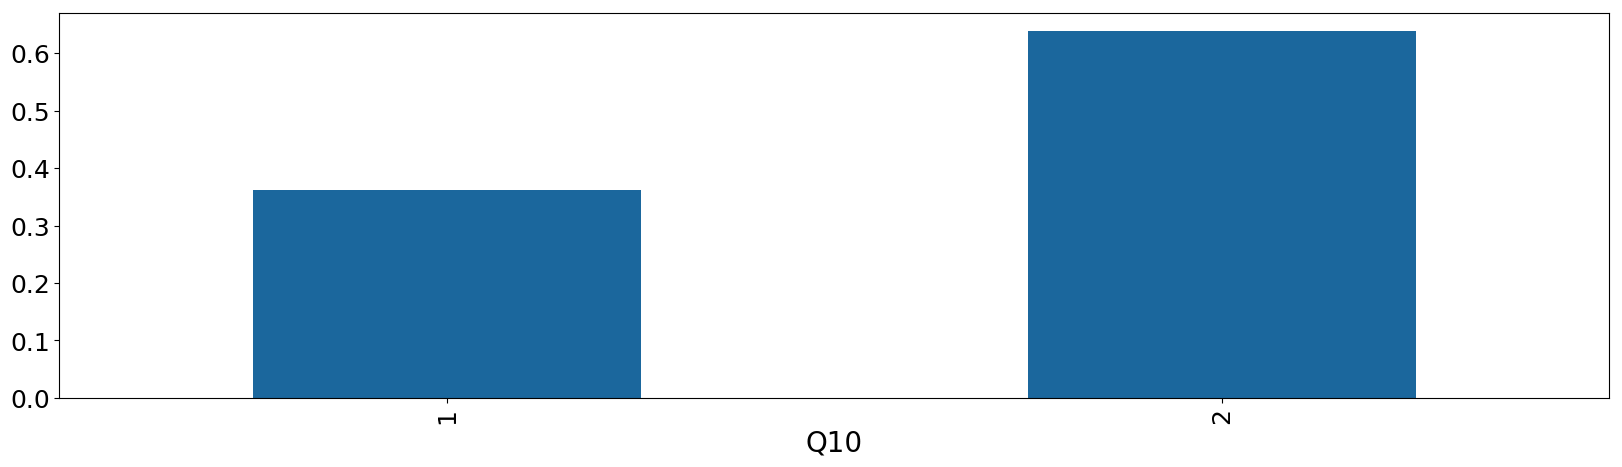

In [20]:
analyzeWeightedResponses('Q10')

In [21]:
# num_res_df.loc['Q10']

In [22]:
# master_df.groupby('Q10').agg({'weight':'sum'})

** Q11 - During the plan phase, a business person will think through how the business will run and draw up a business plan. Would you like the City of Gainesville to provide services during the plan phase? **

In [23]:
# num_res_df.loc['Q11']

In [24]:
# q11 = survey_df['Q11'].value_counts(normalize = True)

In [25]:
# q11_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q11_choices[i-1] ,q11.loc[i]*100)

In [26]:
# merged_df.groupby('Q11').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q11'].isnull()].sum()*100

In [27]:
# yes_counts_df = merged_df[merged_df['Q11'] == 1]['Business Type'].value_counts()
# yes_counts_df[:15].plot(kind='bar',figsize=(20,10))

In [28]:
# no_counts_df = merged_df[merged_df['Q11'] == 2]['Business Type'].value_counts()
# no_counts_df[:15].plot(kind='bar',figsize=(20,10))

In [29]:
# TODO: this could be more useful if we filter out types with few responses

# yes_rates_df = 100*yes_counts_df/(yes_counts_df + no_counts_df)
# yes_rates_df.sort_values(inplace=True, ascending=True)
# yes_rates_df[yes_rates_df > 0].plot(kind='barh',figsize=(20, 20))

** Stats w.r.t businesses that consider themselves to be successful **

In [30]:
# temp_series = (survey_df['Q11'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

In [31]:
print(survey_df['Q27_1'].value_counts())
print(survey_df['Q27_2'].value_counts())
print(survey_df['Q27_3'].value_counts())
print(survey_df['Q27_4'].value_counts())

1    22
Name: Q27_1, dtype: int64
1    13
Name: Q27_2, dtype: int64
1    16
Name: Q27_3, dtype: int64
1    6
Name: Q27_4, dtype: int64


** Q12    - During the finance phase, money is obtained by pooling savings or gifts, or obtaining loans or venture capital. Would you like the City of Gainesville to provide services during the finance phase?  **

In [32]:
# num_res_df.loc['Q12']

In [33]:
# q12 = survey_df['Q12'].value_counts(normalize = True)

In [34]:
# q12_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q12_choices[i-1] ,q12.loc[i]*100)

In [35]:
# merged_df.groupby('Q12').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q12'].isnull()].sum()*100

In [36]:
# merged_df[merged_df['Q12'] == 1]['Business Type'].value_counts()[:15].plot(kind='bar',figsize=(20,10))

** Stats w.r.t businesses that consider themselves to be successful **

In [37]:
# temp_series = (survey_df['Q12'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

** Q13    - During the legalize phase, the business undertakes activities such as incorporating or establishing the business as a sole proprietorship. Would you like the City of Gainesville to provide services during the legalize phase?**

In [38]:
# num_res_df.loc['Q13']

In [39]:
# q13 = survey_df['Q13'].value_counts(normalize = True)

In [40]:
# q13_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q13_choices[i-1] ,q13.loc[i]*100)

** Stats w.r.t businesses that consider themselves to be successful **

In [41]:
# temp_series = (survey_df['Q13'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

In [42]:
# merged_df.groupby('Q13').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q13'].isnull()].sum()*100

** Q14    - During the brand phase, the business develops and implements a marketing plan. Would you like the City of Gainesville to provide services during the brand phase? **

In [43]:
# num_res_df.loc['Q14']

In [44]:
# q14 = survey_df['Q14'].value_counts(normalize = True)

In [45]:
# q14_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q14_choices[i-1] ,q14.loc[i]*100)

In [46]:
# survey_df['Q43'][survey_df['Q14'] == 1].value_counts()

In [47]:
# merged_df.groupby('Q14').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q14'].isnull()].sum()*100

** Stats w.r.t businesses that consider themselves to be successful **

In [48]:
# temp_series = (survey_df['Q14'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

** Q15    - During the search phase, the business looks for a physical location for the business. Would you like the City of Gainesville to provide services during the search phase?  **

In [49]:
# num_res_df.loc['Q15']

In [50]:
# q15 = survey_df['Q15'].value_counts(normalize = True)

In [51]:
# q15_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q15_choices[i-1] ,q15.loc[i]*100)

In [52]:
# merged_df.groupby('Q15').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q15'].isnull()].sum()*100

** Stats w.r.t businesses that consider themselves to be successful **

In [53]:
# temp_series = (survey_df['Q15'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

** Q16    - During the shape phase, the business undertakes activities such as drawing up development/building plans. Would you like the City of Gainesville to provide services during the shape phase?   **

In [54]:
# num_res_df.loc['Q16']

In [55]:
# q16 = survey_df['Q16'].value_counts(normalize = True)

In [56]:
# q16_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q16_choices[i-1] ,q16.loc[i]*100)

In [57]:
# merged_df.groupby('Q16').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q16'].isnull()].sum()*100

** Stats w.r.t businesses that consider themselves to be successful **

In [58]:
# temp_series = (survey_df['Q16'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

** Q17    - During the build phase, the physical location is built. Would you like the City of Gainesville to provide services during the build phase?   **

In [59]:
# num_res_df.loc['Q17']

In [60]:
# q17 = survey_df['Q17'].value_counts(normalize = True)

In [61]:
# q17_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q17_choices[i-1] ,q17.loc[i]*100)

In [62]:
# merged_df.groupby('Q17').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q17'].isnull()].sum()*100

** Stats w.r.t businesses that consider themselves to be successful **

In [63]:
# temp_series = (survey_df['Q17'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

** Q18  - The hire phase involves activities such as advertising for employees and hiring them. Would you like the City of Gainesville to provide services during the hire phase?   **

In [64]:
# num_res_df.loc['Q18']

In [65]:
# q18 = survey_df['Q18'].value_counts(normalize = True)

In [66]:
# q18_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q18_choices[i-1] ,q18.loc[i]*100)

In [67]:
# merged_df.groupby('Q18').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q18'].isnull()].sum()*100

** Stats w.r.t businesses that consider themselves to be successful **

In [68]:
# temp_series = (survey_df['Q17'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

** Q19 - During the taxes phase, the business puts bookkeeping procedures in place, hires an accountant, etc. Would you like the City of Gainesville to provide services during the taxes phase?  **

In [69]:
# num_res_df.loc['Q19']

In [70]:
# q19 = survey_df['Q19'].value_counts(normalize = True)

In [71]:
# q19_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q19_choices[i-1] ,q19.loc[i]*100)

In [72]:
# merged_df.groupby('Q19').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q19'].isnull()].sum()*100

** Stats w.r.t businesses that consider themselves to be successful **

In [73]:
# temp_series = (survey_df['Q17'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
# print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

** Q20 - The celebrate phase gives the business the opportunity to provide accolades to everyone that helped start the business. Would you like the City of Gainesville to provide services during the celebrate phase?  **

In [74]:
# num_res_df.loc['Q20']

In [75]:
# q20 = survey_df['Q20'].value_counts(normalize = True)

In [76]:
# q20_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q20_choices[i-1] ,q20.loc[i]*100)

In [77]:
# merged_df.groupby('Q20').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q20'].isnull()].sum()*100

** Q21 - During the open phase, the business has a grand opening, starts selling goods or services, etc. Would you like the City of Gainesville to provide services during the open phase?  **

In [78]:
# num_res_df.loc['Q21']

In [79]:
# q21 = survey_df['Q21'].value_counts(normalize = True)

In [80]:
# q21_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q21_choices[i-1] ,q21.loc[i]*100)

In [81]:
# merged_df.groupby('Q21').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q21'].isnull()].sum()*100

** Q22 - The grow phase starts the process of brainstorming again and moving forward with increasing the size of the business. Would you like the City of Gainesville to provide services during the grow phase?  **

In [82]:
# num_res_df.loc['Q22']

In [83]:
# q22 = survey_df['Q22'].value_counts(normalize = True)

In [84]:
# q22_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q22_choices[i-1] ,q22.loc[i]*100)

In [85]:
# merged_df.groupby('Q22').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q22'].isnull()].sum()*100

*** Combined Plot for Q10 - Q22 ***

In [86]:
question_phase_pairs = [
    ('Q10', 'Dream'),
    ('Q11', 'Plan'),
    ('Q12', 'Finance'),
    ('Q13', 'Legalize'),
    ('Q14', 'Brand'),
    ('Q15', 'Search'),
    ('Q16', 'Shape'),
    ('Q17', 'Build'),
    ('Q18', 'Hire'),
    ('Q19', 'Taxes'),
    ('Q20', 'Celebrate'),
    ('Q21', 'Open'),
    ('Q22', 'Grow')
]

question_names = list(zip(*question_phase_pairs)[0])
phase_names = list(zip(*question_phase_pairs)[1])

stage1 = range(0, 5)
stage2 = range(5, 8)
stage3 = range(8, 13)
phase_count = 13

stage1_fill = '#FDCE07'
stage2_fill = '#5BCAED'
stage3_fill = '#EC472D'

# Reduced brightness to 75%
stage1_dark = '#c29e02'
stage2_dark = '#18B0DE'
stage3_dark = '#C12911'

yes_counts = survey_df[question_names].applymap(lambda x: 0 if x == 2 else x).sum()
no_counts = survey_df[question_names].applymap(lambda x: 1 if x == 2 else 0).sum()
total_counts = survey_df[question_names].applymap(lambda x: 1 if x >= 0 else 0).sum()
yes_rates = yes_counts / total_counts

*** Plot only percentages ***

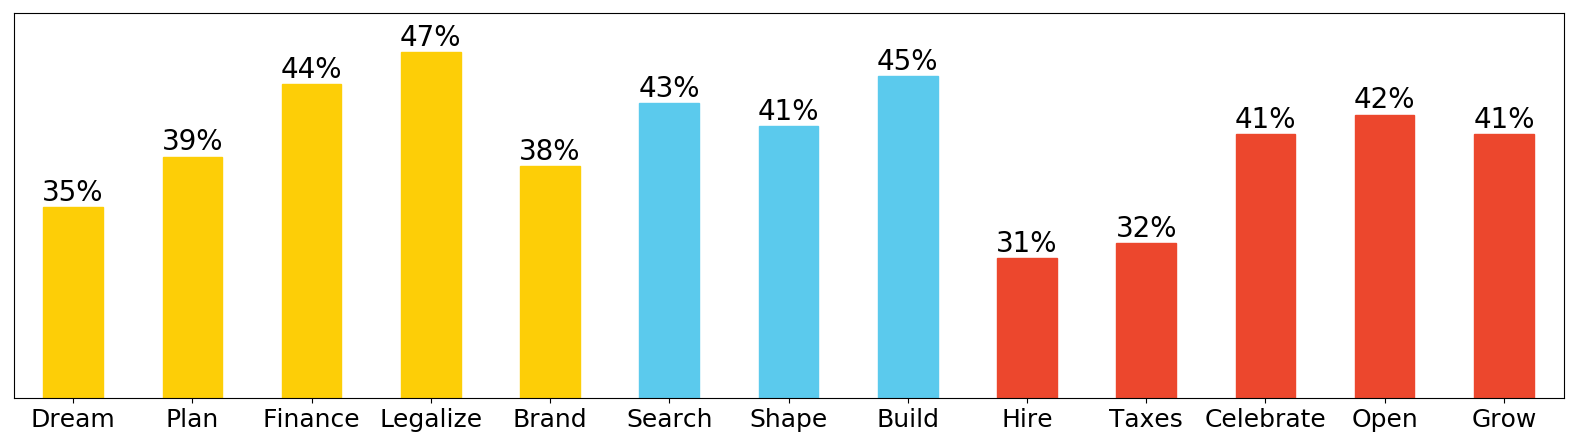

In [87]:
ax = yes_rates.plot(kind='bar', ylim=[.2, .5], figsize=(20, 5));


# Color code to match the Dept. of Doing's lifecycles figure
shapes = ax.get_children()
for x in shapes[0:5]: x.set_color(stage1_fill)  # Stage 1
for x in shapes[5:8]: x.set_color(stage2_fill)  # Stage 2
for x in shapes[8:13]: x.set_color(stage3_fill) # Stage 3

# Change y axis to percentages
ax.yaxis.set_visible(False)
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# Annotate percentage values
ax.set_xticklabels(phase_names, rotation=0);
patches_len = len(ax.patches)
half = patches_len/2
for i, p in enumerate(ax.patches):
    pos = (
        p.get_x()+ p.get_width()/2,
        p.get_height() +.005
    )
    norm = p.get_height()

    # Percentage
    ax.annotate(str(int(round(100 * p.get_height()))) + '%', pos, ha='center')

    # Total
#     pos = (pos[0], pos[1] - .025)
#     ax.annotate("{:,}".format(count), pos, ha='center', size=14)

*** Plot yes/no side by side ***

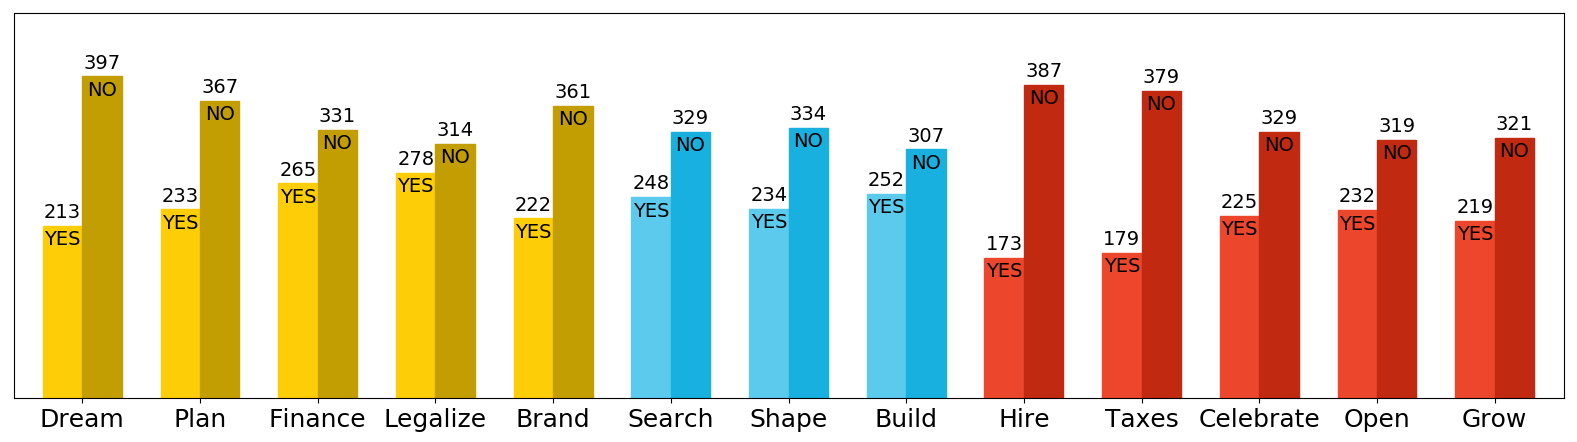

In [88]:
temp_df = pd.DataFrame(data={'Yes': yes_counts, 'No': no_counts})

ax = temp_df[['Yes', 'No']].plot(kind='bar', figsize=(20, 5), ylim=[0, 475], width=.67);
ax.legend_.set_visible(False)

# Color code to match the Dept. of Doing's lifecycles figure
shapes = ax.get_children()
for x in [shapes[i] for i in stage1]: x.set_color(stage1_fill)
for x in [shapes[i] for i in stage2]: x.set_color(stage2_fill)
for x in [shapes[i] for i in stage3]: x.set_color(stage3_fill)

# Make "no" bars a little darker
for x in [shapes[i + phase_count] for i in stage1]: x.set_color(stage1_dark)
for x in [shapes[i + phase_count] for i in stage2]: x.set_color(stage2_dark)
for x in [shapes[i + phase_count] for i in stage3]: x.set_color(stage3_dark)

# Change y axis to percentages
ax.yaxis.set_visible(False)
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# Annotate percentage values
ax.set_xticklabels(phase_names, rotation=0);
patches_len = len(ax.patches)
half = patches_len/2
for i, p in enumerate(ax.patches):
    pos = (
        p.get_x() + p.get_width()/2,
        p.get_height() + 5
    )
    norm = p.get_height()

    # Percentage
    ax.annotate(str(int(round(p.get_height()))), pos, ha='center', va='bottom', size=14)

    # Yes or No
    pos = (
        pos[0],
        p.get_height() - 5
    )
    ax.annotate(("YES" if i < 13 else "NO"), pos, ha='center', va='top', size=14)

** Frequency distribution for Q11 - Q22 **

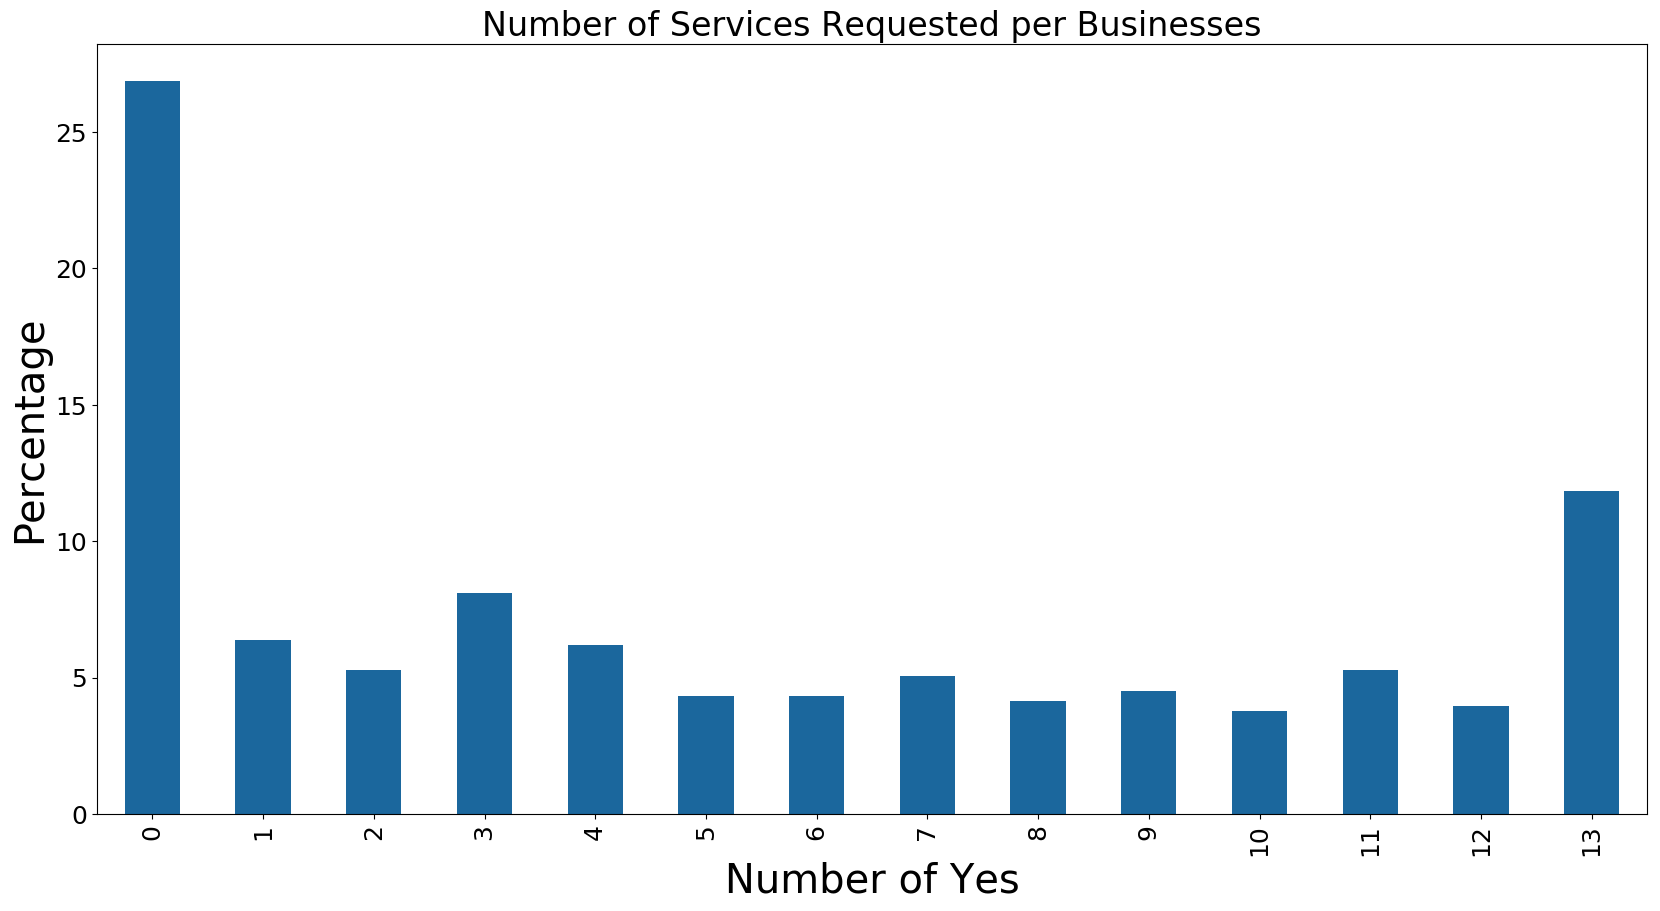

In [89]:
temp = survey_df['Q10'].apply(lambda x: 0 if x == 2 else x)

for i in range(11,23):
#     global temp
    temp += survey_df['Q' + str(i)].apply(lambda x: 0 if x == 2 else x)
    
temp = temp.dropna().apply(lambda x: int(x))

ax = (temp.value_counts(normalize=True).sort_index()*100).plot(kind='bar', title='Number of Services Requested per Businesses')
ax.set_xlabel('Number of Yes', size='x-large');
ax.set_ylabel('Percentage', size='x-large');

In [90]:
# phase_votes_df = pd.DataFrame()
# phase_votes_df['Plan'] = q11
# phase_votes_df['Finance'] = q12
# phase_votes_df['Legalize'] = q13
# phase_votes_df['Brand'] = q14
# phase_votes_df['Search'] = q15
# phase_votes_df['Shape'] = q16
# phase_votes_df['Build'] = q17
# phase_votes_df['Hire'] = q18
# phase_votes_df['Taxes'] = q19
# phase_votes_df['Celebrate'] = q20
# phase_votes_df['Open'] = q21
# phase_votes_df['Grow'] = q22

# # phase_votes_df.apply(lambda x: str(int(x*100)) + '%' if type(x) == float else x)

# phase_votes_df.drop(labels=[2], inplace=True)
# phase_votes_df = phase_votes_df.transpose()
# phase_votes_df[1] = phase_votes_df[1].apply(lambda x: int(x*100))

# ax = phase_votes_df.plot(kind='bar', legend=False, title='Help Wanted per Phase')#, figsize=(20,10))
# ax.set_xlabel('Business Phase', size='x-large')
# ax.set_ylabel('Percentage', size='x-large')

** Q24 - The next series of questions is about your interaction with the City of Gainesville. Often times, when establishing a business location, a search is done. In the last 12 months, did you conduct a search for this location? **

In [91]:
# merged_df.groupby('Q24').agg({'weight' : 'sum'})/merged_df['weight'][~merged_df['Q24'].isnull()].sum()*100

** Q25 - While you were searching for this location, what City of Gainesville departments did you interact with about this search? **

In [92]:
# count_arr = []
# for i in range(1,8):
#     column = 'Q25_' + str(i)
#     print("Choice {0}: {1}".format(i,merged_df[column].value_counts()[1]))
#     count_arr.append(merged_df[column].value_counts()[1])

In [93]:
# # Find totla number of peoplw who actually responded
# q25_choices_number = ['weight']
# for i in range(1,8):
#     q25_choices_number.append('Q25_' + str(i))
# temp_df = merged_df[q25_choices_number].dropna(subset=q25_choices_number[1:], how='all')
# print("Number of people who responded: {0}".format(temp_df.shape[0]))
# print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

In [94]:
# get_percentages(count_arr, temp_df.shape[0])

In [95]:
# weighted_count_arr = []
# for option_no, col in enumerate(q25_choices_number):
#     if col != 'weight':
#         aggr_data = temp_df.groupby(col).agg({'weight' : 'sum'})
#         print("Choice {0}: {1}".format(option_no, aggr_data['weight'][1]))
#         weighted_count_arr.append(aggr_data['weight'][1])

In [96]:
# get_percentages(weighted_count_arr, temp_df['weight'].sum())

** Q26 - In the last 12 months, did you draw up development/building plans for this location? **

In [97]:
# weighted_df = merged_df.groupby('Q26').agg({'weight' : 'sum'})
# weighted_df

In [98]:
# weighted_df/merged_df['weight'][~merged_df['Q26'].isnull()].sum()*100

** Q27 - While you were drawing up development/building plans for this location, what City of Gainesville departments did you interact with about the development/building plans?(Only asked to people who said yes to previous question) **

In [99]:
# count_arr = []
# for i in range(1,8):
#     column = 'Q27_' + str(i)
#     print("Choice {0}: {1}".format(i,merged_df[column].value_counts()[1]))
#     count_arr.append(merged_df[column].value_counts()[1])

In [100]:
# get_percentages(count_arr,32)

In [101]:
# # Find total number of people who actually responded
# q27_choices_number = ['weight']
# for i in range(1,8):
#     q27_choices_number.append('Q27_' + str(i))
# temp_df = merged_df[q27_choices_number].dropna(subset=q27_choices_number[1:], how='all')
# print("Number of people who responded: {0}".format(temp_df.shape[0]))
# print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

In [102]:
# weighted_count_arr = []
# for option_no, col in enumerate(q27_choices_number):
#     if col != 'weight':
#         aggr_data = temp_df.groupby(col).agg({'weight' : 'sum'})
#         print("Choice {0}: {1}".format(option_no, aggr_data['weight'][1]))
#         weighted_count_arr.append(aggr_data['weight'][1])

In [103]:
# get_percentages(weighted_count_arr, temp_df['weight'].sum())

** Q28 - In the last 12 months, did you build this location? **

In [104]:
# weighted_df = merged_df.groupby('Q28').agg({'weight' : 'sum'})
# weighted_df

In [105]:
# weighted_df/merged_df['weight'][~merged_df['Q28'].isnull()].sum()*100

** Q29 - While you were building this location, what City of Gainesville departments did you interact with about building this location?(Only asked to people who said yes to previous question)
 **

In [106]:
# count_arr = []
# for i in range(1,8):
#     column = 'Q29_' + str(i)
#     print("Choice {0}: {1}".format(i,0 if merged_df[column].value_counts().empty else merged_df[column].value_counts()[1]))
#     count_arr.append(0 if merged_df[column].value_counts().empty else merged_df[column].value_counts()[1])

In [107]:
# # Find totla number of peoplw who actually responded
# q29_choices_number = ['weight']
# for i in range(1,8):
#     q29_choices_number.append('Q29_' + str(i))
# temp_df = merged_df[q29_choices_number].dropna(subset=q29_choices_number[1:], how='all')
# print("Number of people who responded: {0}".format(temp_df.shape[0]))
# print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

In [108]:
# get_percentages(count_arr, temp_df.shape[0])

In [109]:
# weighted_count_arr = []
# for option_no, col in enumerate(q29_choices_number):
#     if col != 'weight':
#         aggr = temp_df.groupby(col).agg({'weight' : 'sum'})['weight']
#         print("Choice {0}: {1}".format(option_no, 0 if aggr.empty else aggr[1]))
#         weighted_count_arr.append(0 if aggr.empty else aggr[1])

In [110]:
# get_percentages(weighted_count_arr,temp_df['weight'].sum())

** For questions 31 to 42 that have voting for different departments **

** Q31 - On a scale of 0 to 10 where 0 is the worst possible service, and 10 is the best possible service, please rate the quality of service you received from the Department of Doing (Planning and Building Construction). Move the slider below to record your answer. **

In [111]:
# num_res_df.loc['Q31_10']

In [112]:
# q31 = survey_df['Q31_10'].value_counts(normalize=True)

In [113]:
# q31_choices = range(1,11)
# print "{:12}  {:10} \n".format("Rating" ,"Percentage")
# for i in range(10,0,-1): 
#     try:
#         print "{:6}  {:14f} %".format(q31_choices[i-1] ,q31.loc[i]*100)
#     except:
#         pass

In [114]:
# # Weighted counts
# weighted_q31 = merged_df.groupby('Q31_10').agg({'weight':'sum'})
# weighted_q31

** Q32 Public works department **

In [115]:
# # Weighted counts
# weighted_q32 = merged_df.groupby('Q32_10').agg({'weight':'sum'})
# weighted_q32

** Q33 GRU **

In [116]:
# # Weighted counts
# weighted_q33 = merged_df.groupby('Q33_10').agg({'weight':'sum'})
# weighted_q33

** Q34 Budget and finance department **

In [117]:
# survey_df['Q34_10'].value_counts()

In [118]:
# # Weighted counts
# weighted_q34 = merged_df.groupby('Q34_10').agg({'weight':'sum'})
# weighted_q34

** Q35 Community redevelopment agency **

In [119]:
# # Weighted counts
# weighted_q35 = merged_df.groupby('Q35_10').agg({'weight':'sum'})
# weighted_q35

** Creates ranking dataframe **

In [120]:
dept_votes_arr=[]
for i in range(1,6):
    orderedDict = OrderedDict()
    demo = survey_df['Q3' + str(i) + '_10'].value_counts()
    orderedDict['0-3'] = demo[demo.index <= 3].sum()
    orderedDict['4-6'] = demo[(demo.index > 3) & (demo.index <= 6)].sum()
    orderedDict['7-10'] = demo[(demo.index > 6) & (demo.index <= 10)].sum()
    
    demo = survey_df['Q3' + str(i) + '_10']
    orderedDict['Average'] = float(demo.sum())/float(demo.count())

    dept_votes_arr.append(orderedDict)

In [121]:
# dept_votes_arr

In [122]:
dept_names = [
    'Department of Doing',
    'Public Works Department',
    'GRU',
    'Budget and Finance Department',
    'Community Redevelopment Agency'
]

ranking_df = pd.DataFrame(dept_votes_arr, index=dept_names)
ranking_df['Responses'] = ranking_df['0-3'] + ranking_df['4-6'] + ranking_df['7-10']
ranking_df.sort_values(by='Responses', ascending=False, inplace=True)

In [123]:
ranking_df

,0-3,4-6,7-10,Average,Responses
Department of Doing,9,5,25,6.820513,39
GRU,5,13,21,6.358974,39
Budget and Finance Department,3,4,16,7.000000,23
Public Works Department,3,6,12,7.000000,21
Community Redevelopment Agency,0,1,6,8.000000,7


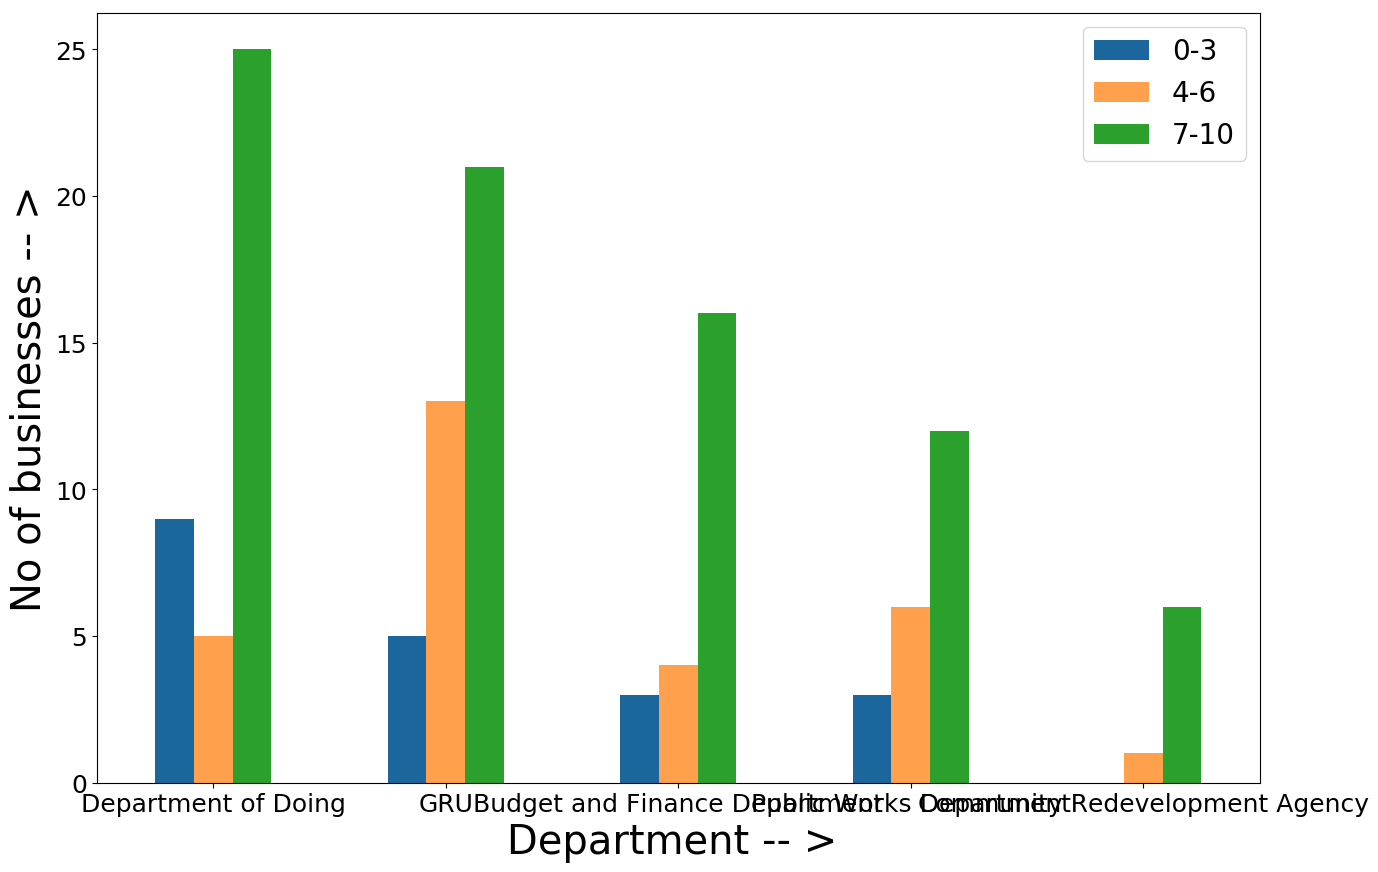

In [124]:
ax = ranking_df[['0-3', '4-6', '7-10']].plot(kind='bar', rot=0, figsize=(15,10))
ax.set_xlabel('Department -- > ', size='x-large');
ax.set_ylabel('No of businesses -- >', size='x-large');

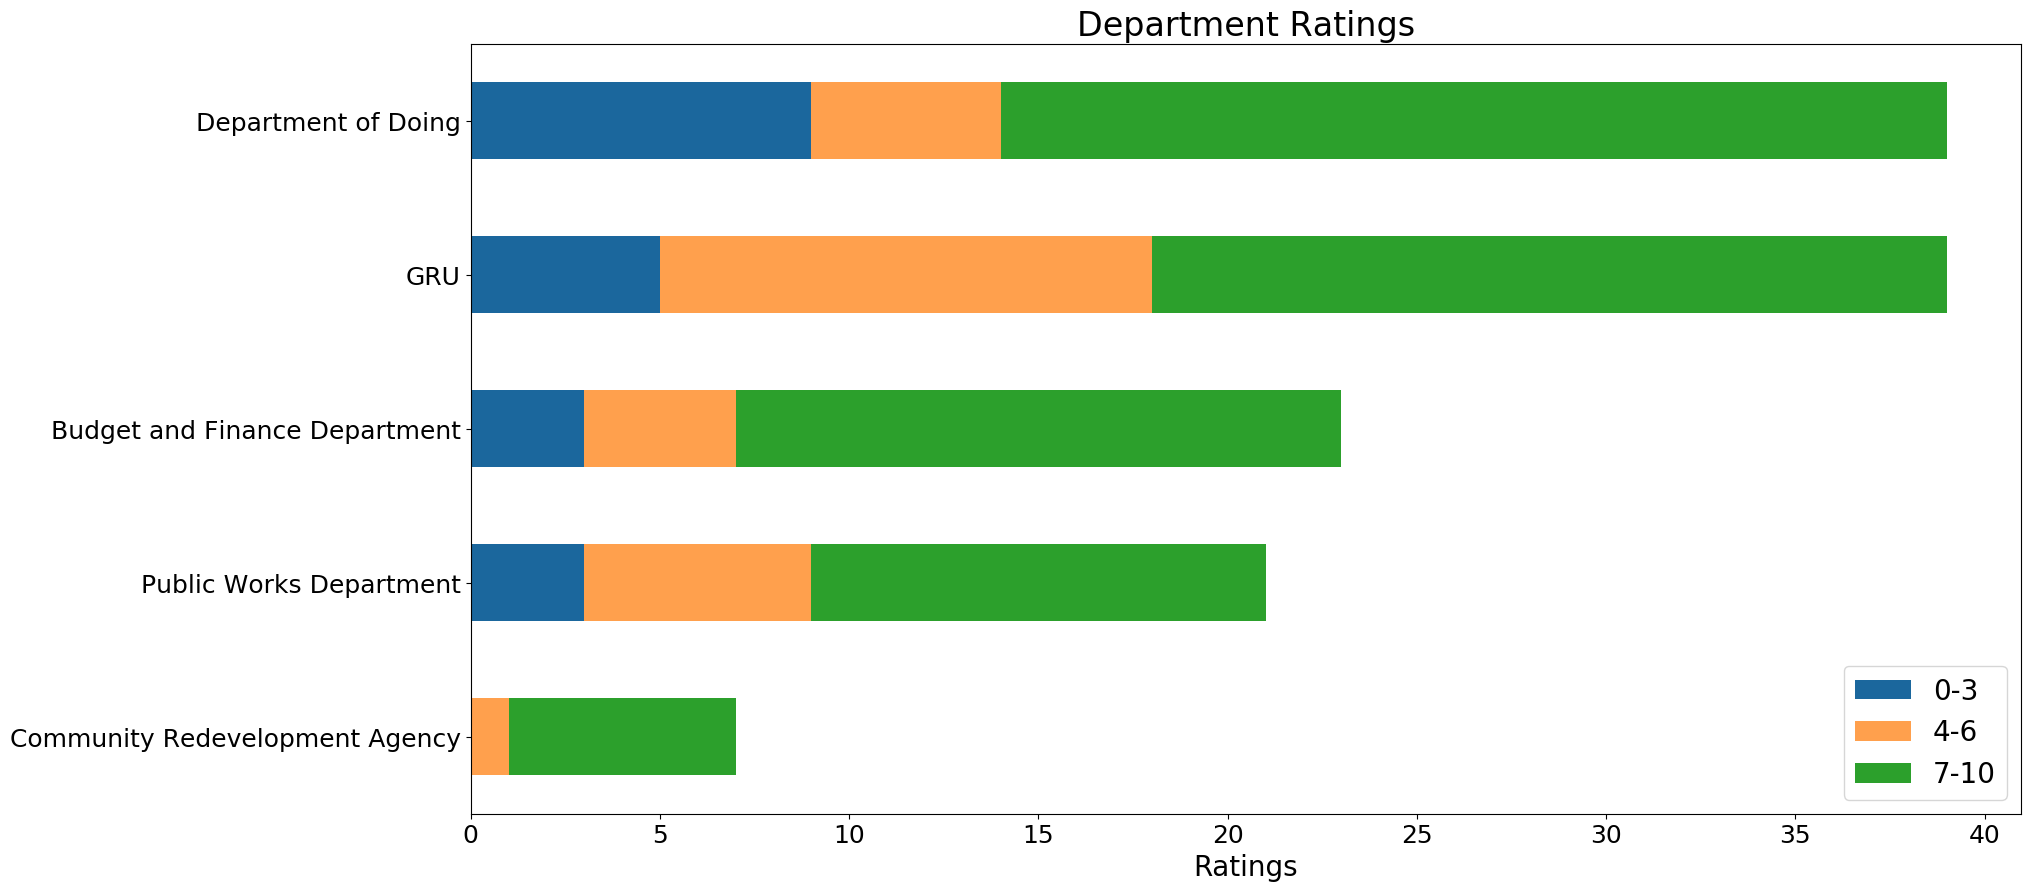

In [125]:
ax = ranking_df[['0-3', '4-6', '7-10']].plot(kind='barh', title='Department Ratings', stacked=True)
ax.set_xlabel('Ratings');
ax.invert_yaxis()

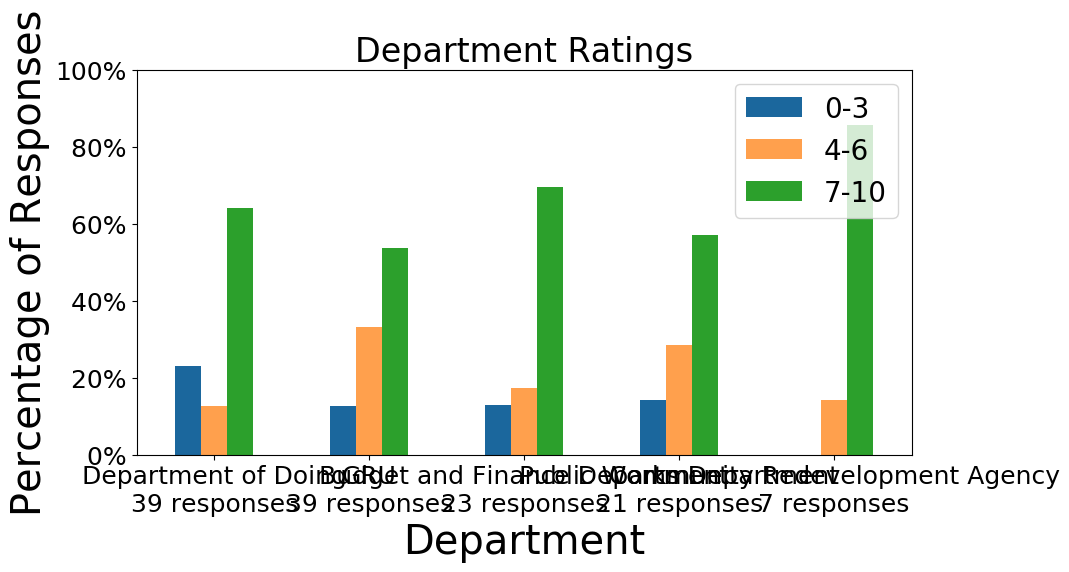

In [126]:
# Let's normalize these results!
ranking_norm_df = pd.DataFrame(ranking_df[['0-3', '4-6', '7-10']].apply(lambda x: x/sum(x), axis=1))
# ranking_norm_df = ranking_norm_df.applymap(lambda x: int(100*x))
# ranking_norm_df.sort_values(by='7-10', inplace=True, ascending=False)

# Include average?
# ranking_norm_df.insert(column='Average', loc=3, value=ranking_df['Average']*10)
# ranking_norm_df.sort_values(by='Average', inplace=True, ascending=False)

# Plot
ax = ranking_norm_df.plot(kind='bar', title='Department Ratings', ylim=[0,1], rot=0, figsize=(10, 5))
ax.set_xlabel('Department', size='x-large')
ax.set_ylabel('Percentage of Responses', size='x-large')

# Include number of responses below department names
x_ticks = ax.get_xticklabels()
for x in x_ticks:
    dept_name = x.get_text()
    row = ranking_df.loc[dept_name]
    total_responses = int(row['Responses'])
    x.set_text(x.get_text() + '\n' + str(total_responses) + ' responses')
ax.set_xticklabels(x_ticks);

# Put y axis in percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

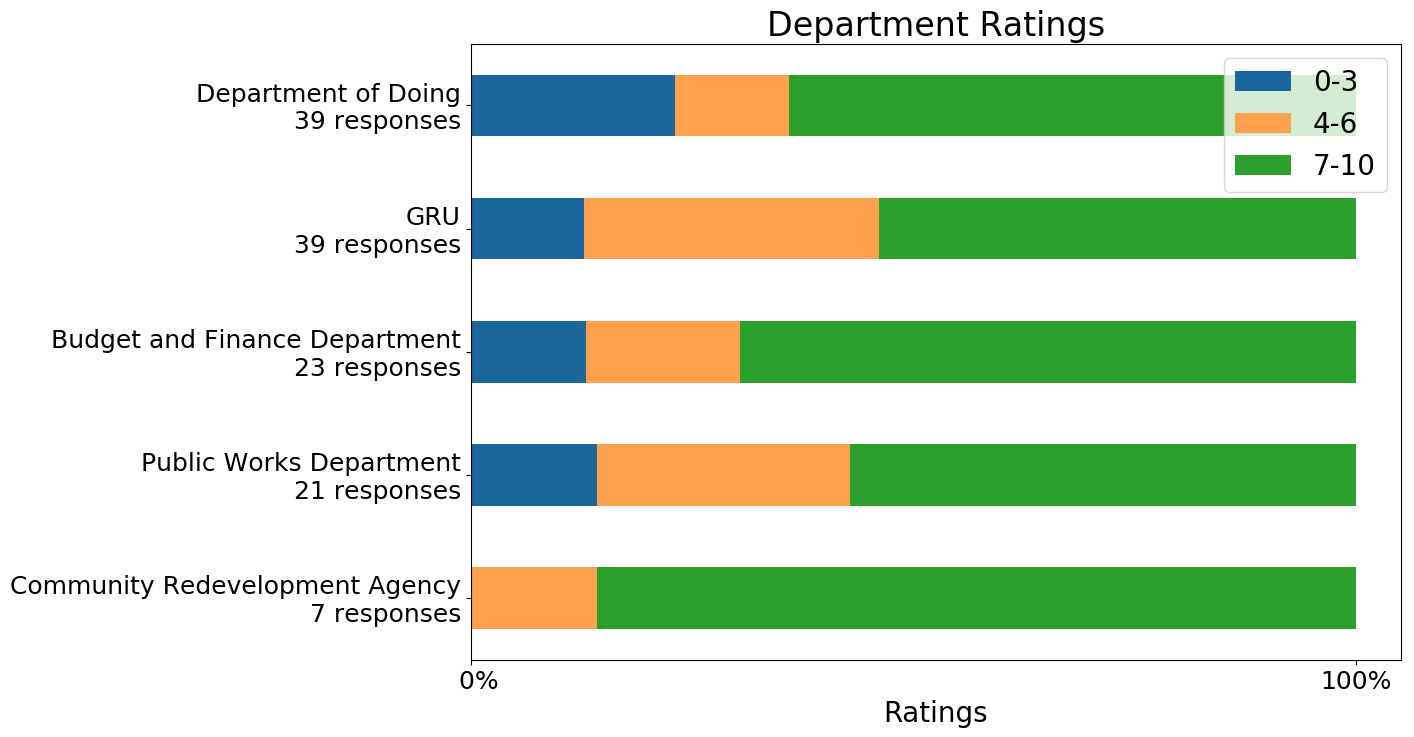

In [127]:
plt.figure()
fig, ax = plt.subplots(1, 1)
ranking_norm_df.plot(ax=ax, figsize=(12, 8), kind='barh', title='Department Ratings', stacked=True)

# Format x axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);
ax.set_xlabel('Ratings')

# Format y axis
ax.set_yticklabels(x_ticks)
ax.invert_yaxis()

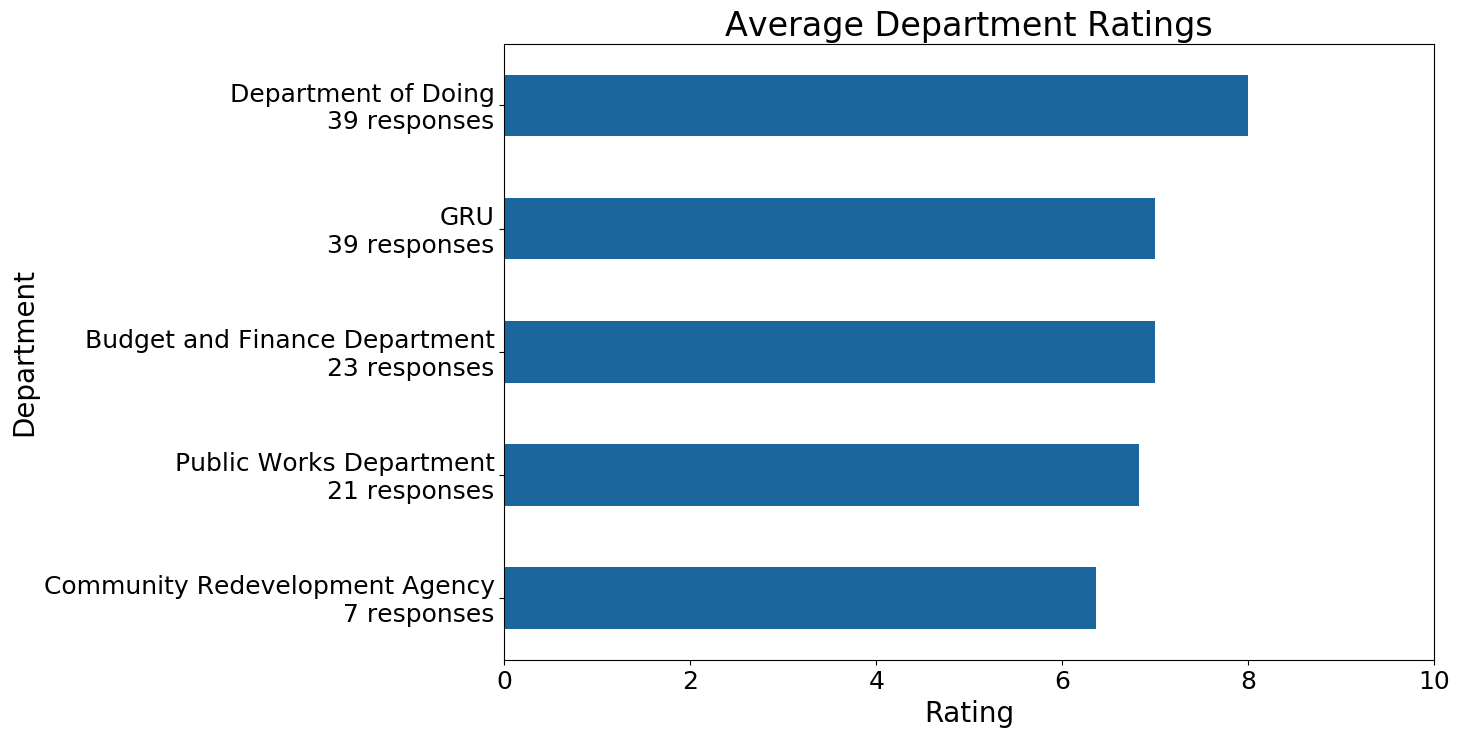

In [128]:
# Uncolored
ax = ranking_df['Average'].sort_values(ascending=False).plot(kind='barh', figsize=(12, 8), title='Average Department Ratings', xlim=[0,10])
ax.set_xlabel('Rating')
ax.set_ylabel('Department')
ax.set_yticklabels(x_ticks)
ax.invert_yaxis()

In [129]:
ranking_norm_df

,0-3,4-6,7-10
Department of Doing,0.230769,0.128205,0.641026
GRU,0.128205,0.333333,0.538462
Budget and Finance Department,0.130435,0.173913,0.695652
Public Works Department,0.142857,0.285714,0.571429
Community Redevelopment Agency,0.000000,0.142857,0.857143


** Without bracketing **

In [130]:
possible_values = [x for x in range(1, 11)]

raw_dept_counts_df = pd.DataFrame(columns=dept_names, index=possible_values)
for i in range(0, 5):
    raw_dept_counts_df[dept_names[i]] = survey_df['Q3' + str(i + 1) + '_10'].value_counts()

raw_dept_counts_df = raw_dept_counts_df.transpose().fillna(0)
raw_dept_counts_df

,1,2,3,4,5,6,7,8,9,10
Department of Doing,2.0,3.0,4.0,1.0,2.0,2.0,5.0,5.0,5.0,10.0
Public Works Department,0.0,1.0,1.0,0.0,4.0,2.0,2.0,1.0,2.0,7.0
GRU,4.0,1.0,0.0,1.0,8.0,4.0,7.0,5.0,5.0,4.0
Budget and Finance Department,0.0,1.0,1.0,0.0,4.0,0.0,4.0,3.0,6.0,3.0
Community Redevelopment Agency,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0


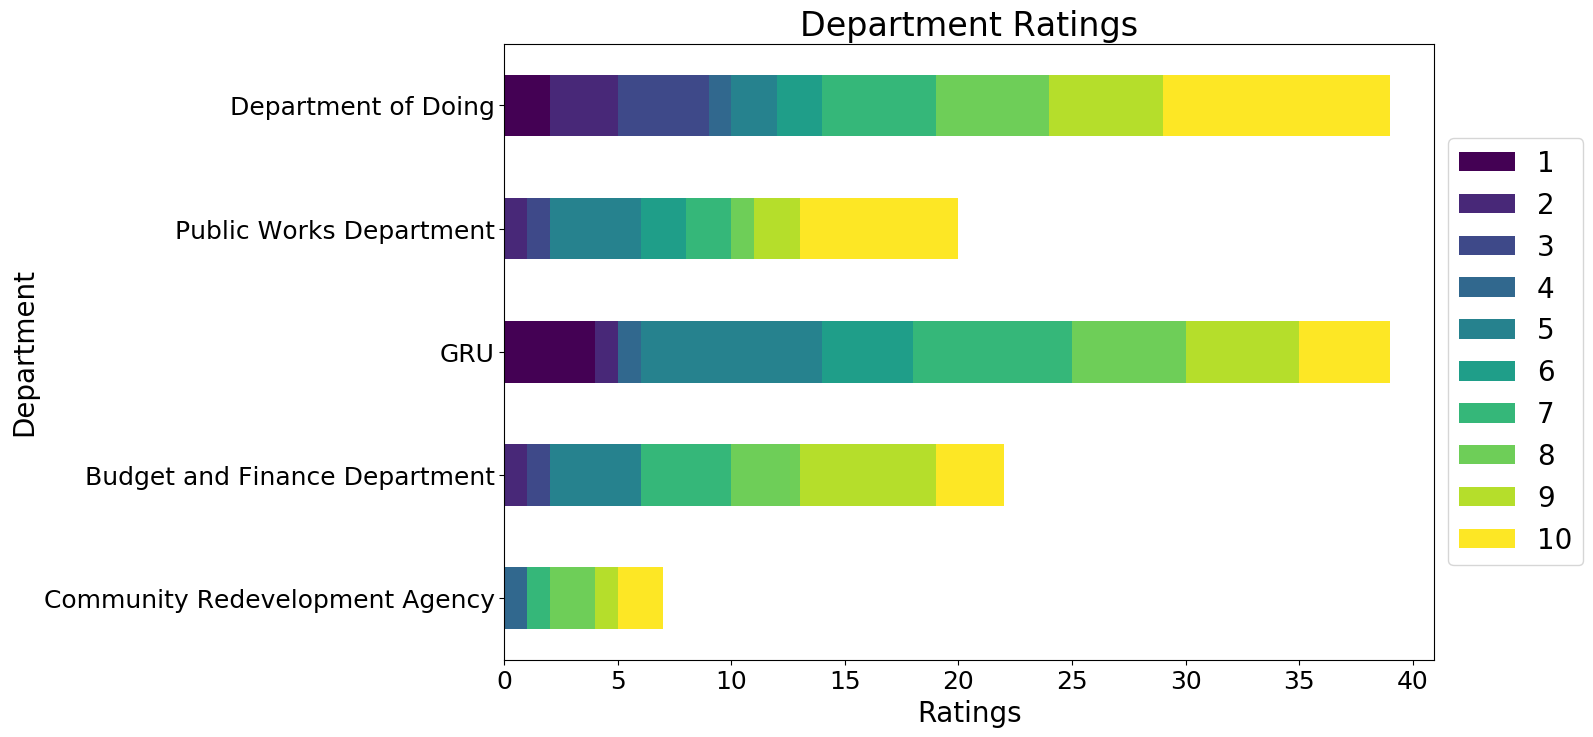

In [131]:
ax = raw_dept_counts_df.plot(kind='barh', figsize=(12, 8), title='Department Ratings', stacked=True, colormap='viridis')
ax.set_xlabel('Ratings')
ax.set_ylabel('Department')
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

** Normalized **

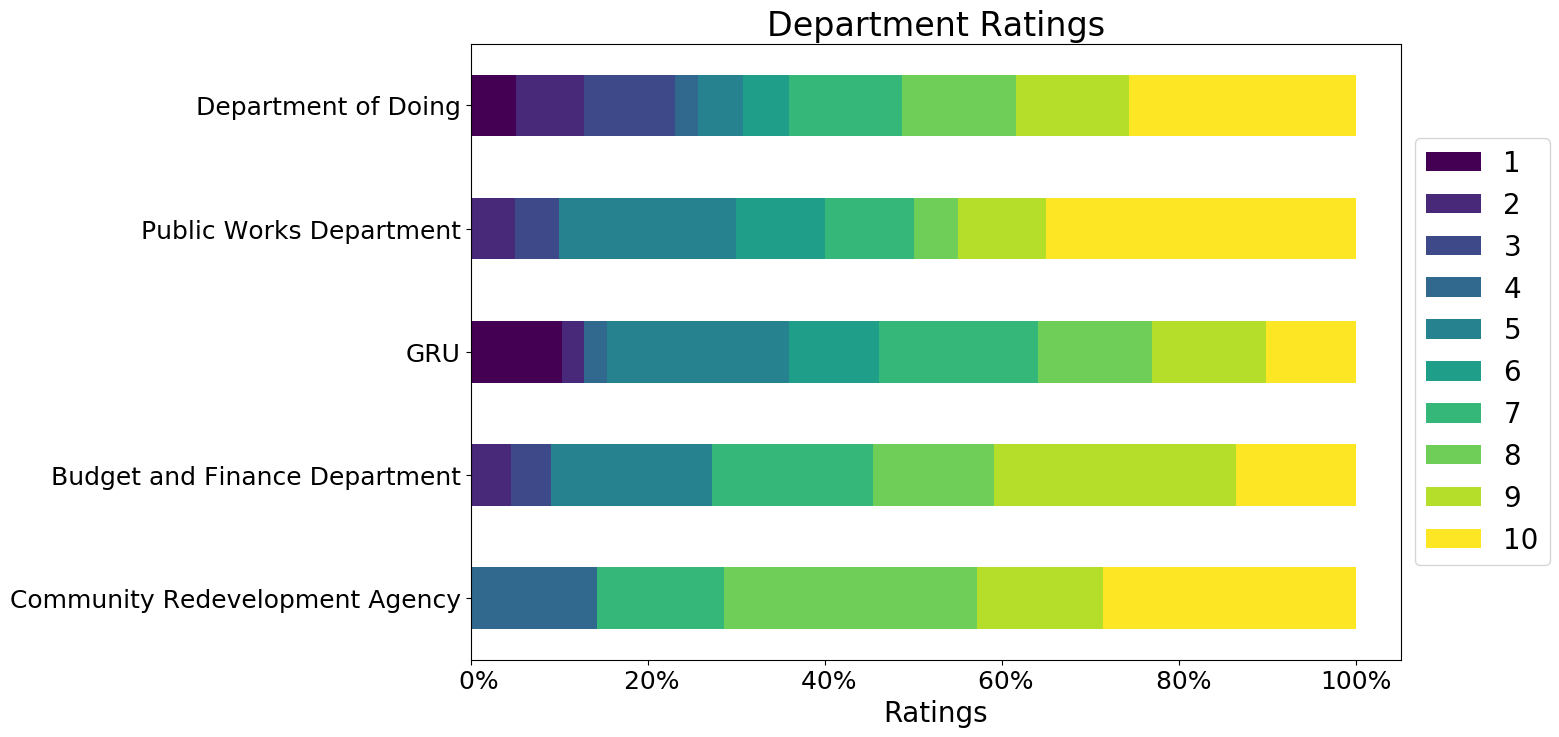

In [132]:
raw_dept_norms_df = pd.DataFrame(raw_dept_counts_df[possible_values].apply(lambda x: x/sum(x), axis='columns'))

ax = raw_dept_norms_df.plot(kind='barh', figsize=(12, 8), title='Department Ratings', stacked=True, colormap='viridis', legend=False)
ax.set_xlabel('Ratings')
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Change x axis to percentages
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

In [133]:
raw_dept_norms_df

,1,2,3,4,5,6,7,8,9,10
Department of Doing,0.051282,0.076923,0.102564,0.025641,0.051282,0.051282,0.128205,0.128205,0.128205,0.256410
Public Works Department,0.000000,0.050000,0.050000,0.000000,0.200000,0.100000,0.100000,0.050000,0.100000,0.350000
GRU,0.102564,0.025641,0.000000,0.025641,0.205128,0.102564,0.179487,0.128205,0.128205,0.102564
Budget and Finance Department,0.000000,0.045455,0.045455,0.000000,0.181818,0.000000,0.181818,0.136364,0.272727,0.136364
Community Redevelopment Agency,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.285714,0.142857,0.285714


** Q39 => During which of these 3 phases would you like the City of Gainesville to improve services already of **

In [134]:
numPeoplWhoResponded = 0
def getCount(row):
    if not row.isnull().all():
        print row
        global numPeoplWhoResponded
        numPeoplWhoResponded += 1

In [135]:
temp_df = master_df[['Weight','Q39_1', 'Q39_2','Q39_3','Q39_4']].dropna(subset=['Q39_1', 'Q39_2','Q39_3','Q39_4'], how='all')
temp_df['Weight'].sum()

52.142517700558955

In [136]:
numPeoplWhoResponded

0

In [137]:
# q39_choices_text = ['Search - business looks for a location','Shape - business draws up development/building plans',
#                     'Build - business builds the physical location','None of the above']
# q39_num = ['Q39_1','Q39_2','Q39_3','Q39_4']
# print "        {:45s} {:10s}\n".format('Choice','Number of votes')
# for i in range(4):
#     print "{:55s} --- {:5}".format(q39_choices_text[i], num_res_df.loc[q39_num[i]].loc['Number of responses'] )

In [138]:
# weighted_count_arr = []
# for i in q39_num:
#     aggr_data = merged_df.groupby(i).agg({'weight':'sum'})
#     print(aggr_data['weight'][1])
#     weighted_count_arr.append(aggr_data['weight'][1])

In [139]:
# get_percentages(weighted_count_arr, temp_df['weight'].sum())

** 	Q40 => Were there services you were seeking from the City of Gainesville, but unable to find, during any of these 3 phases? Please select all that apply.  **

In [140]:
# numPeoplWhoResponded = 0
# # merged_df[['Q40_1','Q40_2','Q40_3','Q40_4']].apply(getCount, axis=1)

In [141]:
# numPeoplWhoResponded

In [142]:
# q40_choices_text = ['Search - business looks for a location','Shape - business draws up development/building plans',
#                     'Build - business builds the physical location','None of the above']
# q40_num = ['Q40_1','Q40_2','Q40_3','Q40_4']
# print "        {:45s} {:10s}\n".format('Choice','Number of votes')
# for i in range(4):
#     print "{:55s} --- {:5}".format(q40_choices_text[i], num_res_df.loc[q40_num[i]].loc['Number of responses'] )

In [143]:
# for i in q40_num:
#     print(merged_df.groupby(i).agg({'weight':'sum'})['weight'][1])

** Q41 - How likely are you to recommend opening a business in Gainesville to others? **

In [144]:
# num_res_df.loc['Q41']

In [145]:
# q41 = survey_df['Q41'].value_counts(normalize=True)

In [146]:
# q41_choices = ['Extremely likely','Very likely','Moderately likely', 'Slightly likely','Not at all likely']
# for i in range(1,6):
#     print "{:20s} ----- {:4f} %".format(q41_choices[i-1] ,q41.loc[i]*100)

In [147]:
#Weightted counts of each choice
# merged_df.groupby('Q41').agg({'weight':'sum'})

In [148]:
# count_of_neg_resp = 0
# for i in range(1,3):
#     temp_series = survey_df['Q41'][survey_df['Q43']==i].value_counts()
#     count_of_neg_resp += temp_series[5] + temp_series[4]
# print("Number of people that see business as successful but are slightly or not at all likely at recommending Gainesville to others: {0}".format(count_of_neg_resp))
# print("Percentage of total = {0}%".format(100*count_of_neg_resp/num_res_df.loc['Q41']['Number of responses']))

In [149]:
# q41 = merged_df[merged_df['Business Type'].isin(['RETAIL MERCHANT','RESTAURANT','CONSULTANT','ATTORNEY/LAWYER'])]['Q41'].value_counts(normalize=True)

In [150]:
# q41_choices = ['Extremely likely','Very likely','Moderately likely', 'Slightly likely','Not at all likely']
# for i in range(1,6):
#     print "{:20s} ----- {:4f} %".format(q41_choices[i-1] ,q41.loc[i]*100)

** Q42  - You said you are "Choice of Q41" to recommend opening a business in Gainesville to others. Did your experience with the City of Gainesville influence your answer? ** 

In [151]:
# num_res_df.loc['Q42']

In [152]:
# q42 = survey_df['Q42'].value_counts(normalize=True)

In [153]:
# q42_choices = ['Yes', 'No']
# for i in range(1,3): 
#     print "{:5s} ----- {:4f} %".format(q42_choices[i-1] ,q42.loc[i]*100)

In [154]:
#Weighted result
# merged_df.groupby('Q42').agg({'weight':'sum'})

In [155]:
# # Resposnses to recommendation question influenced by City services
# temp_series = survey_df['Q41'][survey_df['Q42'] == 1]
# num = temp_series.value_counts()[4] + temp_series.value_counts()[5]
# denom = len(temp_series)
# print("Percentage of people who say they are slightly or not at all likely to recommend Gainesville due to their experience with City: {0}%".format(100*num/denom))

In [156]:
# ddf = pd.crosstab(merged_df['Q41'], merged_df['Q42'], normalize=True)*100
# ddf.index=q41_choices
# ddf.columns=['Yes','No']
# ddf['Total'] = ddf['Yes'] + ddf['No']
# ddf

** Q43  - How would you rate the success of your business at this location?  ** 

In [157]:
successLabelValues = [
    ['Very Successful', 1],
    ['Somewhat Successful', 2],
    ['Somewhat Unsuccessful', 3],
    ['Very Unsuccessful', 4]
]

successLabels = [x[0] for x in successLabelValues]
successValues = [x[1] for x in successLabelValues]

successLabelValue = dict(zip(successLabels, successValues))
successValueLabel = dict(zip(successValues, successLabels))

In [158]:
successLabelValue

{'Somewhat Successful': 2,
 'Somewhat Unsuccessful': 3,
 'Very Successful': 1,
 'Very Unsuccessful': 4}

In [159]:
successValueLabel

{1: 'Very Successful',
 2: 'Somewhat Successful',
 3: 'Somewhat Unsuccessful',
 4: 'Very Unsuccessful'}

In [160]:
# num_res_df.loc['Q43']

In [161]:
# q43 = survey_df['Q43'].value_counts(normalize = True)

In [162]:
# q43_choices = ['Very Successful','Somewhat Successful','Somewhat Unsuccessful','Very Unsuccessful']
# for i in range(1,5):
#     print "{:25s} ----- {:4f} %".format(q43_choices[i-1] ,q43.loc[i]*100)

In [163]:
# # Weighted reponses
# merged_df.groupby('Q43').agg({'weight':'sum'})

In [164]:
# success_bus_typewise = []
# for bus_type in merged_df['Business Type'].unique():
#     success_classi = merged_df[merged_df['Business Type'] == bus_type]['Q43'].value_counts()
#     succ_dict = OrderedDict()
#     succ_dict['Very unsuccessful'] = 0
#     succ_dict['Somewhat successful/Unsuccessful'] = 0
#     succ_dict['Very successful'] = 0
    
#     for i in success_classi.index:
#         if i == 1:
#             succ_dict['Very successful'] = success_classi[i]
#         if i == 2 or i == 3:
#             succ_dict['Somewhat successful/Unsuccessful'] = success_classi[i] # BAD - this overwites SS with SU
#         if i == 4:
#             succ_dict['Very unsuccessful'] = success_classi[i]
#     success_bus_typewise.append(succ_dict)            

In [165]:
# master_df['Business Type'].unique()

In [166]:
# merged_df[merged_df['Business Type'] == 'BEAUTY PARLOR']['Q43'].value_counts()

In [167]:
# columns = ['Business Type', 'Total'] +  successLabels

# counts = merged_df[merged_df['Business Type'] == 'BEAUTY PARLOR']['Q43'].value_counts()
# test = pd.Series(index=columns)

# for i in successValues:
#     test[successValueLabel[i]] = counts[i] if i in counts else 0
# test['Total'] = counts.sum()

# test #np.isnan(counts[1])

In [168]:
# def getSuccessfulnessByColumn(column):
#     data_df = master_df
#     columns = ['Total'] +  successLabels

#     fill_df = success_by_type_df = pd.DataFrame(columns=columns)
#     fill_df = fill_df.rename_axis(column, axis='index')

#     # Count up successfulness responses for each business type
#     for key in data_df[column].unique():
#         response_counts = data_df[data_df[column] == key]['Successfulness'].value_counts()
#         row = pd.Series(index=columns, name=key);

#         # Put counts in series
#         for i in successValues:
#             row[successValueLabel[i]] = response_counts[i] if i in response_counts else 0
#         row['Total'] = response_counts.sum()

#         # Add row to the dataframe as a row
#         fill_df = fill_df.append(row)

#     return fill_df

In [169]:
def getSuccessfulnessByColumn(column):
    data_df = master_df
    columns = ['Total'] + successLabels

    fill_df = pd.DataFrame(columns=columns, index=data_df[column].unique())

    # Count up successfulness responses for each unique index
    fill_df['Total'] = data_df[column].value_counts()

    for index, row in fill_df.iterrows():
        success_counts = data_df[data_df[column] == index]['Successfulness'].value_counts()
        for x in success_counts.keys():
            fill_df.set_value(index=index, col=x, value=success_counts[x])

    return fill_df.fillna(0)

In [170]:
success_by_type_df = getSuccessfulnessByColumn('Business Type')

success_by_type_df.sort_values(by='Total', ascending=False)

,Total,Very Successful,Somewhat Successful,Somewhat Unsuccessful,Very Unsuccessful
RETAIL MERCHANT,845,25,27,3,1
INSURANCE COMPANY OR BROKER,428,0,0,0,0
BARBER SHOP,374,2,2,1,0
RESTAURANT,368,12,18,1,0
APARTMENT OR CONDO RENTALS,263,4,4,1,0
BARBER/COSMETOLOGIST/NAIL TECH,182,3,0,0,0
INTERIOR JANITORIAL AND CLEANING SERVICES,164,7,2,1,2
REPAIRS NOT REQUIRING STATE LICENSE,160,4,4,0,0
ATTORNEY/LAWYER,151,14,11,1,0
BEAUTY PARLOR,125,3,4,0,0


In [171]:
success_by_naics_df = getSuccessfulnessByColumn('NAICS Type')

success_by_naics_df[:1]

,Total,Very Successful,Somewhat Successful,Somewhat Unsuccessful,Very Unsuccessful
"Professional, Scientific, and Technical Services",1027.0,51,66,7,0


In [172]:
# success_by_type_df = getSuccessfulnessByColumn('Business Type')

# success_by_type_df.sort_values(['Total'], ascending=0, inplace=True)

# # Let's only plot the successfulness
# columns = successLabels

# # Make them pretty
# colors = ['C3', 'C1', 'C8', 'C2']

# # Let's group everything not in the most-common-15 in a single bin
# others_df = success_by_type_df.drop(axis='index', labels=success_by_type_df[:15].index)
# success_by_type_df = success_by_type_df[:15].append(others_df.sum().rename("ALL OTHERS"))
# success_by_type_df[:15].sort_values(['Very Successful'], ascending=0).plot(kind='bar', y=columns, color=colors, figsize=(15,10), stacked =True)

### Count Successfulness Responses per Business Type 

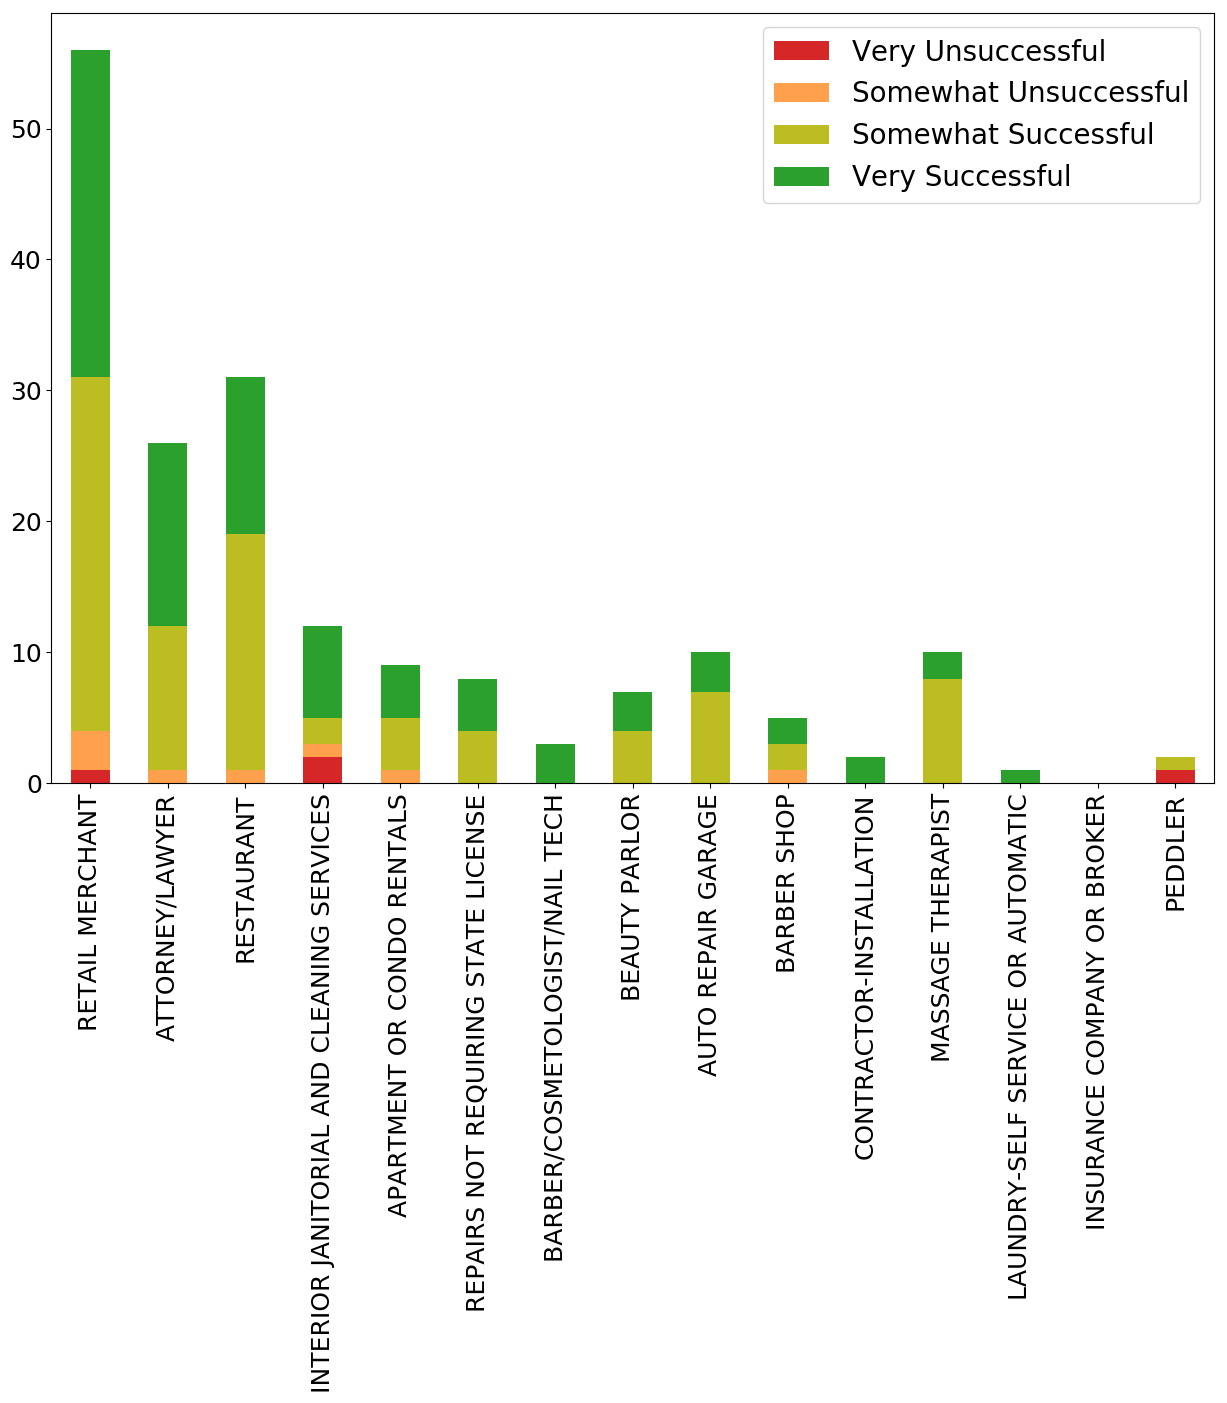

In [173]:
success_by_type_df = getSuccessfulnessByColumn('Business Type').sort_values(['Total'], ascending=0)

# Let's only plot the successfulness
columns = successLabels[::-1]

# Make them pretty
colors = ['C3', 'C1', 'C8', 'C2']

# Let's group everything not in the most-common-15 in a single bin
others_df = success_by_type_df.drop(axis='index', labels=success_by_type_df[:15].index)
success_by_type_df = success_by_type_df[:15].append(others_df.sum().rename("ALL OTHERS"))
success_by_type_df[:15].sort_values(['Very Successful'], ascending=0).plot(kind='bar', y=columns, color=colors, figsize=(15,10), stacked=True)

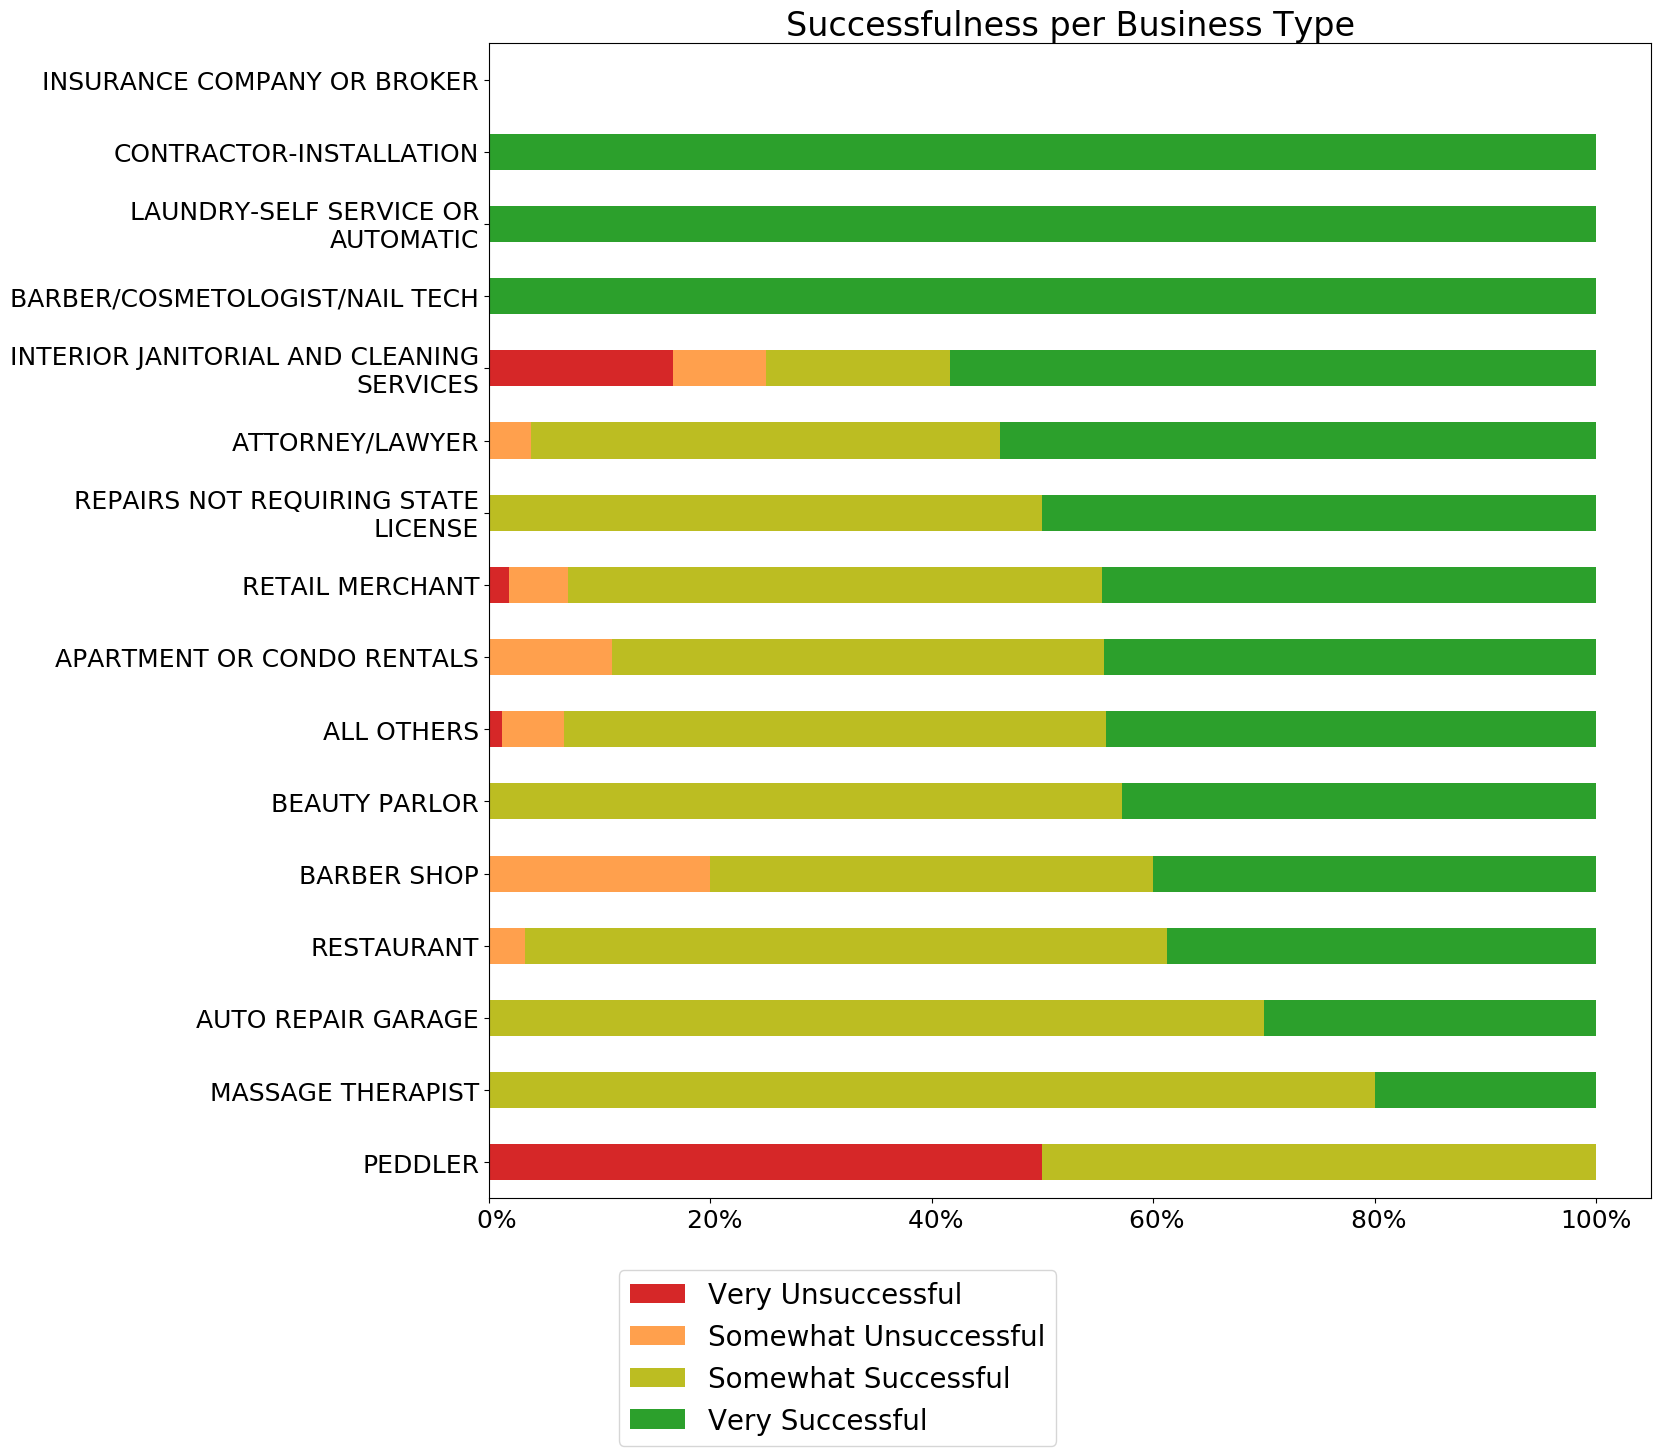

In [174]:
# Let's normalize those results!
norm_success_by_type_df = pd.DataFrame(success_by_type_df[columns].apply(lambda x: x/sum(x), axis=1))

# Make them pretty
colors = ['C3', 'C1', 'C8', 'C2']
ax = norm_success_by_type_df[:16].sort_values(['Very Successful'], ascending=1).plot(kind='barh', color=colors, title='Successfulness per Business Type', figsize=(15,15), stacked=True)

# Change x axis to percentages
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

# Shorten y axis labels
vals = ax.get_yticklabels()
ax.set_yticklabels(['\n'.join(textwrap.wrap(x.get_text(), width=32)) for x in vals]);

ax.legend(loc='upper right', bbox_to_anchor=(0.5, -0.05));

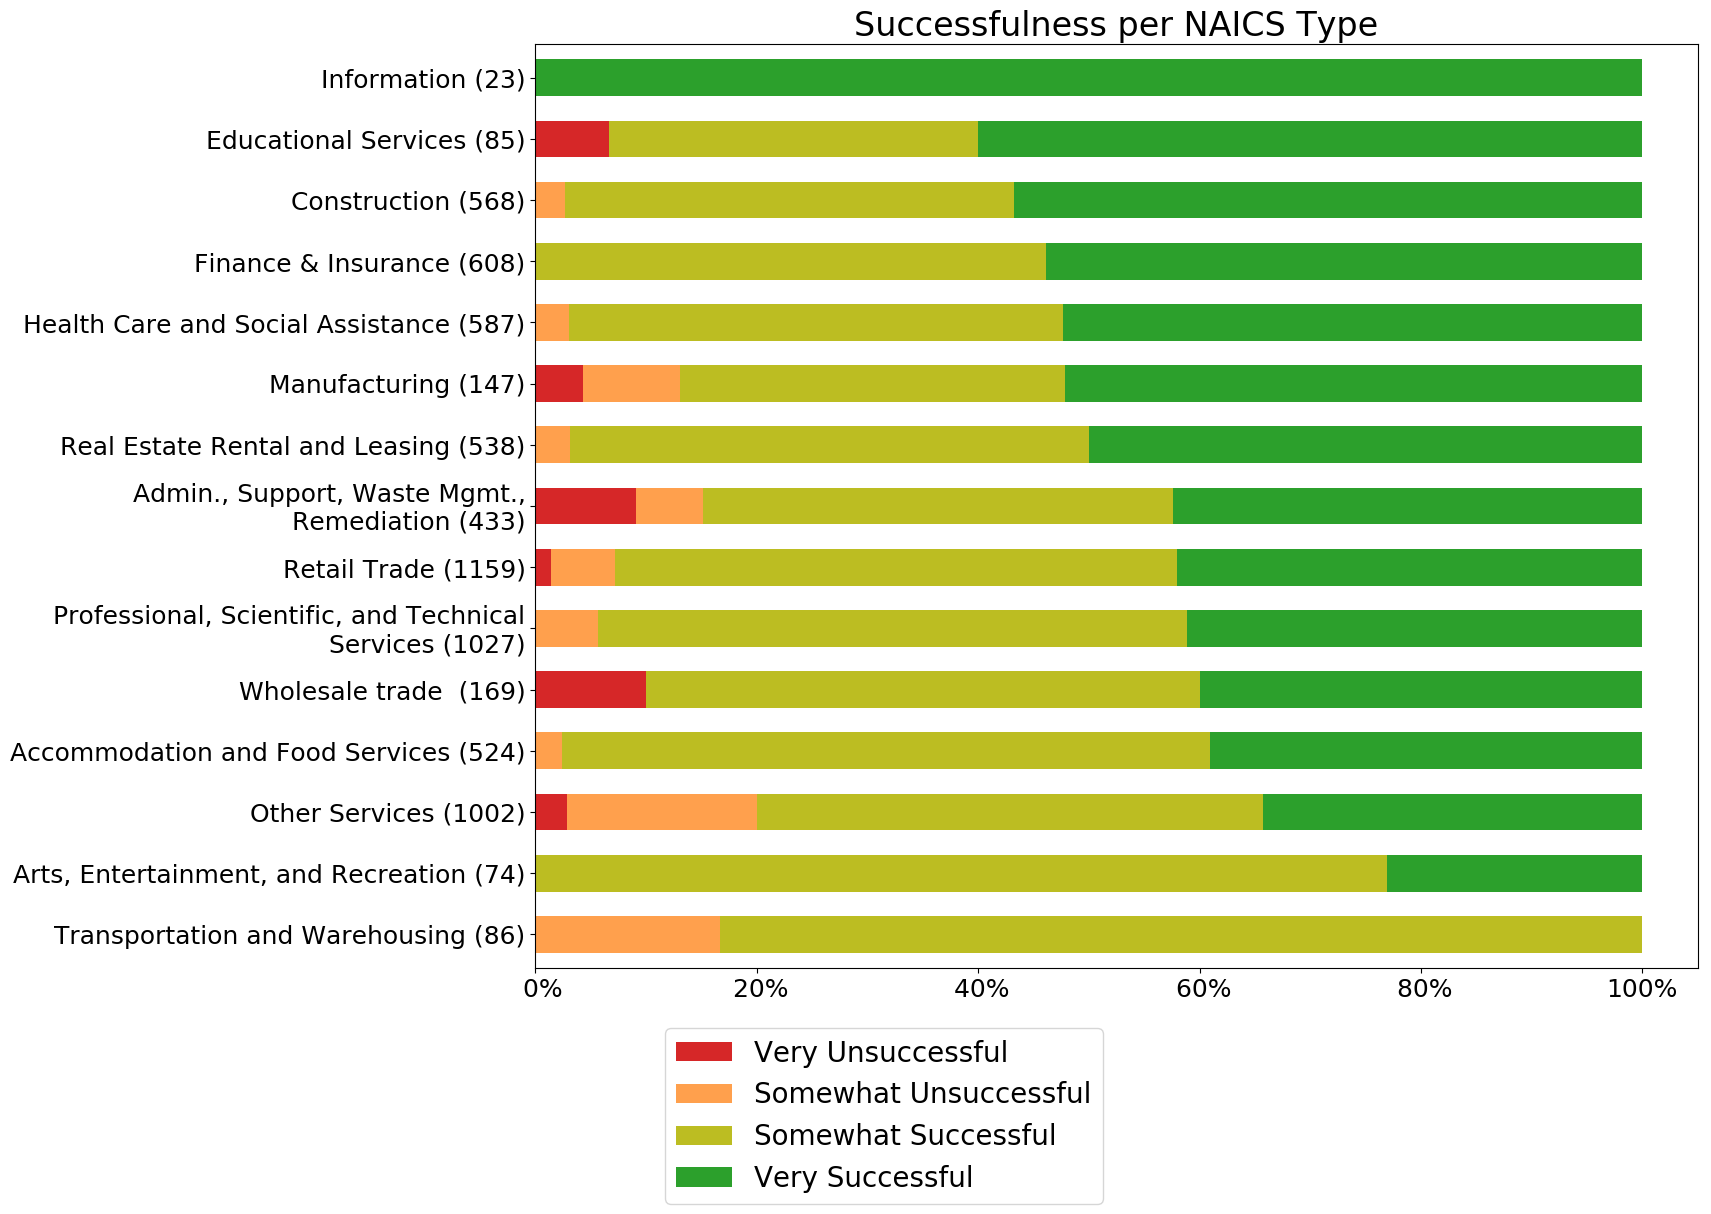

In [175]:
# Get success by NAICS
success_by_naics_df = getSuccessfulnessByColumn('NAICS Type')

# Let's normalize those results!
norm_success_by_naics_df = pd.DataFrame(success_by_naics_df[columns].apply(lambda x: x/sum(x), axis=1))

# Make them pretty
colors = ['C3', 'C1', 'C8', 'C2']

# Drop types with no data
norm_success_by_naics_df.dropna(inplace=True)

ax = norm_success_by_naics_df.sort_values(['Very Successful'], ascending=1).plot(kind='barh', color=colors, title='Successfulness per NAICS Type', figsize=(15,12), stacked=True, width=0.6)

# Change x axis to percentages
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# Shorten y axis labels
vals = ax.get_yticklabels()
new_vals = []
for x in vals:
    text = x.get_text();

    # Add "total" to the label
    text += ' (' + str(int(success_by_naics_df['Total'][text])) + ')'

    # Break long names into multiple lines
    text = '\n'.join(textwrap.wrap(text, width=40))

    new_vals.append(text)

ax.set_yticklabels(new_vals);

ax.legend(loc='upper right', bbox_to_anchor=(0.5, -0.05));

In [176]:
# merged_df[(merged_df['Q43'] == 1)]['Business Type'].value_counts()[:25].plot(kind='bar', figsize = (20,10))

In [177]:
# merged_df[(merged_df['Q43'] == 3) | (merged_df['Q43'] == 4)]['Business Type'].value_counts()[:25].plot(kind='bar', figsize = (20,10))

** Q44 - You said your business has been Very/Somewhat Successful/Unsuccessful. What are the reasons? 
 **

In [178]:
# # Find totla number of peoplw who actually responded
# q44_choices_number = ['weight']
# for i in range(1,6):
#     q44_choices_number.append('Q44_' + str(i))
# temp_df = merged_df[q44_choices_number].dropna(subset=q44_choices_number[1:], how='all')
# print("Number of people who responded: {0}".format(temp_df.shape[0]))
# print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

In [179]:
# weighted_count_arr = []
# for i, col in enumerate(q44_choices_number):
#     if col != 'weight':
#         aggr = temp_df.groupby(col).agg({'weight' : 'sum'})['weight']
#         print("Choice {0}: {1}".format(i, 0 if aggr.empty else aggr[1]))
#         weighted_count_arr.append( 0 if aggr.empty else aggr[1])

In [180]:
# get_percentages(weighted_count_arr, temp_df['weight'].sum())

In [181]:
# numPeoplWhoResponded = 0
# merged_df[['Q44_1','Q44_2','Q44_3','Q44_4','Q44_5']].apply(getCount, axis=1)

In [182]:
# numPeoplWhoResponded

In [183]:
# print merged_df['Q44_1'].value_counts()
# print merged_df['Q44_2'].value_counts()
# print merged_df['Q44_3'].value_counts()
# print merged_df['Q44_4'].value_counts()
# print merged_df['Q44_5'].value_counts()

### New Crosstab

In [184]:
# merged_df[['Q43', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5']].head()

In [185]:
# pd.DataFrame(data=survey_df['Q43'].value_counts())

In [186]:
def weighted_sum(series):
    return reduce(lambda x, y: x * y, series)

In [187]:
# temp = pd.crosstab(master_df['Successfulness'], master_df['Successfulness'])

# crosstab_df = pd.DataFrame()

# # Calculate total number of responses per option
# weights = master_df['Business Type'].map(weightsDict)
# for i in range(1,6):
#     temp = pd.crosstab(master_df['Q43'], master_df['Q44_' + str(i)], weights, aggfunc=sum)
#     crosstab_df[i] = temp[1]
# crosstab_df = crosstab_df.fillna(0)

# crosstab_df['Total Respondents'] = survey_df['Q43'].value_counts()

# # Name columns and rows
# crosstab_df.rename(
#     columns={
#         1:'The actions of business owners',
#         2:'The state of the local economy',
#         3:'Prior experience with a similar business',
#         4:'Interactions with the City of Gainesville',
#         5:'Other'
#     },
#     index={
#         1:'Very Successful',
#         2:'Somewhat Successful',
#         3:'Somewhat Unsuccessful',
#         4:'Very Unsuccessful'
#     },
#     inplace=True)

# # Put into percentages
# crosstab_norm_df = pd.DataFrame(crosstab_df.copy())

# for i, row in crosstab_norm_df.iterrows():
#     total = row[5]
#     for j in range(0,5):
#         row[j] /= total
#     crosstab_norm_df.loc[i] = row

# # Format nicely
# columns = crosstab_norm_df.columns[0:5]
# crosstab_norm_df['Total Respondents'] = crosstab_norm_df['Total Respondents'].astype('int')

# crosstab_norm_df[columns].applymap(lambda x: "{0:.0%}".format(x))

In [188]:
# crosstab_df

In [189]:
# all_successful = crosstab_df.loc['Very Successful'] + crosstab_df.loc['Somewhat Successful']
# all_successful / all_successful['Total Respondents']

In [190]:
# all_unsuccessful = crosstab_df.loc['Very Unsuccessful'] + crosstab_df.loc['Somewhat Unsuccessful']
# all_unsuccessful / all_unsuccessful['Total Respondents']

In [191]:
# binary_crosstab_df = pd.DataFrame(index=['Successful', 'Unsuccessful'], columns=crosstab_df.columns)

# # Group into Successful or Unsuccessful
# binary_crosstab_df.loc['Successful'] = crosstab_df.loc['Very Successful'] + crosstab_df.loc['Somewhat Successful'];
# binary_crosstab_df.loc['Unsuccessful'] = crosstab_df.loc['Very Unsuccessful'] + crosstab_df.loc['Somewhat Unsuccessful'];

# # Put into percentages
# binary_crosstab_norm_df = pd.DataFrame(binary_crosstab_df.copy())

# for i, row in binary_crosstab_norm_df.iterrows():
#     total = row[5]
#     for j in range(0,5):
#         row[j] /= total
#     binary_crosstab_norm_df.loc[i] = row

# # Format nicely
# columns = binary_crosstab_norm_df.columns[0:5]
# binary_crosstab_norm_df['Total Respondents'] = binary_crosstab_norm_df['Total Respondents'].astype('int')

# binary_crosstab_norm_df[columns].applymap(lambda x: "{0:.0%}".format(x))

In [192]:
# temp_df = crosstab_norm_df.drop(axis='columns', labels='Total Respondents')
# ax = temp_df.plot(kind='bar', title='Success Factors', rot=0, figsize=(20,10))
# ax.set_xlabel('')
# ax.set_ylabel('')

# ax.legend(loc='upper right', bbox_to_anchor=(1, -0.12))

# # Include number of responses below success levels
# x_ticks = ax.get_xticklabels()
# for x in x_ticks:
#     label = x.get_text()
#     row = crosstab_df.loc[label]
#     total_responses = int(row[5])
#     x.set_text(x.get_text() + '\n' + str(total_responses) + ' responses')
# ax.set_xticklabels(x_ticks);

# # Put y axis in percentages
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

### Other reasons for "Very Successful"

In [193]:
# merged_df[merged_df['Q43'] == 1]['Q44_5_TEXT'].value_counts()

### Other reasons for "Somewhat Successful"

In [194]:
# merged_df[merged_df['Q43'] == 2]['Q44_5_TEXT'].value_counts()

### Other reasons for "Somewhat Unsuccessful"

In [195]:
# merged_df[merged_df['Q43'] == 3]['Q44_5_TEXT'].value_counts()

### Other reasons for "Very Unsuccessful"

In [196]:
# merged_df[merged_df['Q43'] == 4]['Q44_5_TEXT'].value_counts()

In [197]:
# temp = survey_df['Q43'].value_counts()
# df = pd.DataFrame(crosstab_df)
# # for column in df.iteritems():
# #     print column[1]/temp[]

In [198]:
# crosstab_norm_df['test'] = survey_df['Q43'].value_counts()

### Old Crosstab

In [199]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_1'], merged_df['weight'], aggfunc=sum, normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['The actions of the business owners and employees']
# temp['The actions of the business owners and employees']*0.624
# # temp

In [200]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_2'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['The state of the local economy']
# temp['The state of the local economy']*.3987

In [201]:
# temp = pd.crosstab(merged_df['Q43'], merged_df['Q44_3'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
# temp.index = q43_choices[:3]
# temp.columns = ['Prior experience with a similar business']
# temp['Prior experience with a similar business']*0.2698

In [202]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_4'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['Interactions with the City of Gainesville']
# temp['Interactions with the City of Gainesville']*0.0837

In [203]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_5'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['Others']
# temp['Others']*0.22

In [204]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_1'], normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['The actions of the business owners and employees']
# temp

In [205]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_2'], normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['The state of the local economy']
# temp

In [206]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_3'], normalize=True)*100
# temp.index = q43_choices[:3]
# temp.columns = ['Prior experience with a similar business']
# temp

In [207]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_4'], normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['Interactions with the City of Gainesville']
# temp

** Q45 - In the last 5 years, have you done any remodeling at this location? ** 

In [208]:
# num_res_df.loc['Q45']

In [209]:
# q45 = survey_df['Q45'].value_counts(normalize = True)

In [210]:
# q45_choices = ['Yes', 'No']
# for i in range(5,7):
#     print "{:5s} ----- {:4f} %".format(q45_choices[i-5] ,q45.loc[i]*100)

In [211]:
# merged_df.groupby('Q45').agg({'weight':'sum'})

In [212]:
# survey_df['Q43'][survey_df['Q45'] == 5].value_counts()

** Q46  - Was this remodeling done for the purpose of business expansion? ** 

In [213]:
# num_res_df.loc['Q46']

In [214]:
# q46 = survey_df['Q46'].value_counts(normalize = True)

In [215]:
# q46_choices = ['Yes', 'No']
# for i in range(4,6):
#     print "{:5s} ----- {:4f} %".format(q46_choices[i-4] ,q46.loc[i]*100)

In [216]:
# merged_df.groupby('Q46').agg({'weight':'sum'})

In [217]:
# merged_df[merged_df['Q46'] == 4]['Business Type'].value_counts().plot(kind='bar', figsize=(20,10))

** Relating success of business with remodeling for business expansion **

In [218]:
# num_of_succ_business  = survey_df['Q43'].value_counts()[3] + survey_df['Q43'].value_counts()[4]
# num_of_succ_business

In [219]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q45'], merged_df['weight'], aggfunc=sum , normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['Yes','No']
# temp

In [220]:
# temp = pd.crosstab(merged_df['Q43'],merged_df['Q45'], normalize=True)*100
# temp.index = q43_choices
# temp.columns = ['Yes','No']
# temp

** Q47 Revenues for 2016**

In [221]:
# def getDir(row):
#     try:
#         i = row.index('(')
#         co_orinates = row[i+1:-1]
#         return co_orinates
#     except:
#         return None

In [222]:
# from enum import Enum
# class Region(Enum):
#     NE = 0
#     SE = 1
#     SW = 2
#     NW = 3
    
# def getRegion(row):
#     try:
        
#         lat,lng = row.split(',')
#         lat = float(lat)
#         lng = float(lng)
        
#         # REGION POSSIBLE VALUES
#         region = Region.NE

#         if(lat > 29.651961):
#             if(lng < -82.325002):
#                 region = Region.NW
#         else:
#             if(lng < -82.325002):
#                 region = Region.SW
#             else:
#                 region = Region.SE
#         return region
#     except:
#         pass

In [223]:
# merged_df['Region'] = merged_df['Location_y'].apply(getDir).apply(getRegion)

** Q48 - Expenses for 2016 **

In [224]:
# merged_df['Business Type'].value_counts()[:15]

In [225]:
# temp = (survey_df['Expenses in 2017']).dropna()

# print "Minimum:", min(temp)
# print "Maximum:", max(temp)
# print "Mean:", temp.mean()
# print "Standard Deviation:", temp.std()
# print "Count:", len(temp)